# Pandas Cheat Sheet

Current Progress: 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
SEED = 42

## Panda Series

### Numeric Index

In [4]:
data = [1642, 1776, 1867, 1821, 1909]

series_with_numeric_index = pd.Series(data)
series_with_numeric_index

0    1642
1    1776
2    1867
3    1821
4    1909
dtype: int64

|    | |
| -- | -- |
| 0 | 1642 |
| 1 | 1776 |
| 2 | 1867 |
| 3 | 1821 |
| 4 | 1909 |

### Labelled Index

In [5]:
index = ['Aliqua', 'Ad ut Nulla', 'Nisi est Pastrami', 'Jowl Magna', 'Anim Bacon Doner']

series_with_labelled_index = pd.Series(data, index)
series_with_labelled_index

Aliqua               1642
Ad ut Nulla          1776
Nisi est Pastrami    1867
Jowl Magna           1821
Anim Bacon Doner     1909
dtype: int64

|    | |
| -- | -- |
| Aliqua           | 1642 |
| Ad ut Nulla      | 1776 |
| Nisi est Pastram | 1867 |
| Jowl Magna       | 1821 |
| Anim Bacon Doner | 1909 |

If you create a series from a dict, the keys become the labels:

In [6]:
labelled_data = {
    'Aliqua' : 1642,
    'Ad ut Nulla' : 1776,
    'Nisi est Pastrami' : 1867,
    'Jowl Magna' : 1821,
    'Anim Bacon Doner' : 1909
}

series_with_labelled_index2 = pd.Series(labelled_data)
series_with_labelled_index2

Aliqua               1642
Ad ut Nulla          1776
Nisi est Pastrami    1867
Jowl Magna           1821
Anim Bacon Doner     1909
dtype: int64

|    | |
| -- | -- |
| Aliqua           | 1642 |
| Ad ut Nulla      | 1776 |
| Nisi est Pastram | 1867 |
| Jowl Magna       | 1821 |
| Anim Bacon Doner | 1909 |

### Fill Missing Data

In [7]:
before = {
    'Aliqua' : 1642,
    'Ad ut Nulla' : 1776,
    'Nisi est Pastrami' : 1867,
    'Jowl Magna' : 1821,
    'Anim Bacon Doner' : 1909
}

after = {
    'Voluptate Boudin' : 1643,
    'Ad ut Nulla' : 1777,
    'Nisi est Pastrami' : 1868,
    'Jowl Magna' : 1822,
    'Anim Bacon Doner' : 1910
}

In [8]:
before_series = pd.Series(before)
after_series = pd.Series(after)

all_jowl_magna = before_series['Jowl Magna'] + after_series['Jowl Magna']
print(all_jowl_magna)
# 3643

3643


In [9]:
# no fill
before_series + after_series
# If it doesn't exist in both series, int+null = NaN

Ad ut Nulla          3553.0
Aliqua                  NaN
Anim Bacon Doner     3819.0
Jowl Magna           3643.0
Nisi est Pastrami    3735.0
Voluptate Boudin        NaN
dtype: float64

|    | |
| -- | -- |
| Ad ut Nulla       | 3553.0 |
| Aliqua               | NaN |
| Anim Bacon Doner  | 3819.0 |
| Jowl Magna        | 3643.0 |
| Nisi est Pastrami | 3735.0 |
| Voluptate Boudin     | NaN |

In [10]:
# fill missing data with 0
# aka show its original value from the related series
before_series.add(after_series, fill_value=0)

Ad ut Nulla          3553.0
Aliqua               1642.0
Anim Bacon Doner     3819.0
Jowl Magna           3643.0
Nisi est Pastrami    3735.0
Voluptate Boudin     1643.0
dtype: float64

|    |    |
| -- | -- |
| Ad ut Nulla       | 3553.0 |
| Aliqua            | 1642.0 |
| Anim Bacon Doner  | 3819.0 |
| Jowl Magna        | 3643.0 |
| Nisi est Pastrami | 3735.0 |
| Voluptate Boudin  | 1643.0 |

## Panda Dataframes
You can build DF from a dictionary of Series, NumPy arrays, lists, or dictionaries.

### Creating a Dataframe from a Numpy Array
np.random.seed(SEED)
- Initialize the random seed with a specific value->make the "randomness" predictable and reproducible
- Using a seed guarantees that every time you run the code, the exact same random numbers will be generated ->easier debugging/consistency.
- W/o a seed, NumPy will generate random numbers based on the system time or other unpredictable factors
- Same seed = same random numbers

In [11]:
np.random.seed(SEED) # Ensures reproducibility of random numbers

random_data_array = np.random.randint(0,103,(4,3)) 
#generates a 4x3 matrix of random integers btw 0 (inclusive) & 103 (exclusive)
random_data_array

# array([[102,  51,  92],
#        [ 14,  71,  60],
#        [ 20, 102,  82],
#        [ 86,  74,  74]])

array([[102,  51,  92],
       [ 14,  71,  60],
       [ 20, 102,  82],
       [ 86,  74,  74]])

In [12]:
dataframe = pd.DataFrame(random_data_array)
dataframe

,0,1,2
0,102,51,92
1,14,71,60
2,20,102,82
3,86,74,74


|    |  0 |  1 |  2 |
| -- | -- | -- | -- |
| 0 | 102 | 51 | 92 |
| 1 | 14 | 71 | 60 |
| 2 | 20 | 102 | 82 |
| 3 | 86 | 74 | 74 |

In [13]:
# get column labels
dataframe.columns
# RangeIndex(start=0, stop=3, step=1)

RangeIndex(start=0, stop=3, step=1)

In [14]:
# get index labels
dataframe.index
# RangeIndex(start=0, stop=4, step=1)

RangeIndex(start=0, stop=4, step=1)

In [15]:
# get data types
dataframe.dtypes

0    int64
1    int64
2    int64
dtype: object

|    |       |
| -- |   --  |
| 0 | int64 |
| 1 | int64 |
| 2 | int64 |
_dtype: object_

In [16]:
# get number of rows
len(dataframe)
# 4

4

In [17]:
data_index = ['Ad ut Nulla', 'Nisi est Pastrami', 'Jowl Magna', 'Anim Bacon Doner']

data_columns = ['Q1', 'Q2', 'Q3']

In [18]:
dataframe_with_labels = pd.DataFrame(random_data_array, data_index, data_columns)
dataframe_with_labels

,Q1,Q2,Q3
Ad ut Nulla,102,51,92
Nisi est Pastrami,14,71,60
Jowl Magna,20,102,82
Anim Bacon Doner,86,74,74


|    |  Q1 |  Q2 |  Q3 |
| -- | -- | -- | -- |
| Ad ut Nulla | 102 | 51 | 92 |
| Nisi est Pastrami | 14 | 71 | 60 |
| Jowl Magna | 20 | 102 | 82 |
| Anim Bacon Doner | 86 | 74 | 74 |

In [19]:
dataframe_with_labels.info()
# <class 'pandas.core.frame.DataFrame'>
# Index: 4 entries, Ad ut Nulla to Anim Bacon Doner
# Data columns (total 3 columns):
#  #   Column  Non-Null Count  Dtype
# ---  ------  --------------  -----
#  0   Q1      4 non-null      int64
#  1   Q2      4 non-null      int64
#  2   Q3      4 non-null      int64
# dtypes: int64(3)
# memory usage: 128.0+ bytes


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Ad ut Nulla to Anim Bacon Doner
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      4 non-null      int64
 1   Q2      4 non-null      int64
 2   Q3      4 non-null      int64
dtypes: int64(3)
memory usage: 128.0+ bytes


### Creating a Dataframe from a CSV File

In [21]:
wine_dataset = pd.read_csv('datasets/wine-quality.csv')
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6479 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
```

### Creating a Dataframe from a Excel File

In [5]:
wine_dataset = pd.read_excel('datasets/wine-quality.xlsx', sheet_name='Sheet1')

# dependency:
# ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

wine_dataset_excel = pd.DataFrame.from_dict(wine_dataset)

wine_dataset_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
```

In [6]:
wine_dataset_excel.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


|  | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.001 | 3.0 | 0.45 | 8.8 | 6 |
| 1 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.994 | 3.3 | 0.49 | 9.5 | 6 |

### Describe Dataframe

In [7]:
wine_dataset_excel.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


|  | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| count | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 | 4898.000000 |
| mean | 6.854788 | 0.278241 | 0.334192 | 6.391415 | 0.045772 | 35.308085 | 138.360657 | 0.994027 | 3.188267 | 0.489847 | 10.514267 | 5.877909 |
| std | 0.843868 | 0.100795 | 0.121020 | 5.072058 | 0.021848 | 17.007137 | 42.498065 | 0.002991 | 0.151001 | 0.114126 | 1.230621 | 0.885639 |
| min | 3.800000 | 0.080000 | 0.000000 | 0.600000 | 0.009000 | 2.000000 | 9.000000 | 0.987110 | 2.720000 | 0.220000 | 8.000000 | 3.000000 |
| 25 | 	6.300000 | 0.210000 | 0.270000 | 1.700000 | 0.036000 | 23.000000 | 108.000000 | 0.991723 | 3.090000 | 0.410000 | 9.500000 | 5.000000 |
| 50 | 	6.800000 | 0.260000 | 0.320000 | 5.200000 | 0.043000 | 34.000000 | 134.000000 | 0.993740 | 3.180000 | 0.470000 | 10.400000 | 6.000000 |
| 75 | 	7.300000 | 0.320000 | 0.390000 | 9.900000 | 0.050000 | 46.000000 | 167.000000 | 0.996100 | 3.280000 | 0.550000 | 11.400000 | 6.000000 |
| max | 14.200000 | 1.100000 | 1.660000 | 65.800000 | 0.346000 | 289.000000 | 440.000000 | 1.038980 | 3.820000 | 1.080000 | 14.200000 | 9.000000 |


* `DataFrame.count`: Count number of non-NA/null observations.
* `DataFrame.max`: Maximum of the values in the object.
* `DataFrame.min`: Minimum of the values in the object.
* `DataFrame.mean`: Mean of the values.
* `DataFrame.std`: Standard deviation of the observations.
* `DataFrame.25`: Lower percentile - __75%__ of the data is above this value.
* `DataFrame.75`: Upper percentile - __25%__ of the data is above this value.
* `DataFrame.50`: The 50 percentile is the same as the median.


### Dataframe Correlation Matrix

Compute pairwise correlation of columns, excluding NA/null values. Generate values between `-1` and `1` to represent the negative or positive correlation between two values:

In [8]:
wine_dataset_excel.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


|               | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- |	-- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| fixed acidity |	1.000000 | -0.022697 | 0.289181 | 0.089021 | 0.023086 | -0.049396 | 0.091070 | 0.265331 | -0.425858 | -0.017143 | -0.120881 | -0.113663 |
| volatile acidity | -0.022697 | 1.000000 | -0.149472 | 0.064286 | 0.070512 | -0.097012 | 0.089261 | 0.027114 | -0.031915 | -0.035728 | 0.067718 | -0.194723 |
| citric acid | 0.289181 | -0.149472 | 1.000000 | 0.094212 | 0.114364 | 0.094077 | 0.121131 | 0.149503 | -0.163748 | 0.062331 | -0.075729 | -0.009209 |
| residual sugar | 0.089021 | 0.064286 | 0.094212 | 1.000000 | 0.088685 | 0.299098 | 0.401439 | 0.838966 | -0.194133 | -0.026664 | -0.450631 | -0.097577 |
| chlorides | 0.023086 | 0.070512 | 0.114364 | 0.088685 | 1.000000 | 0.101392 | 0.198910 | 0.257211 | -0.090439 | 0.016763 | -0.360189 | -0.209934 |
| free sulfur dioxide | -0.049396 | -0.097012 | 0.094077 | 0.299098 | 0.101392 | 1.000000 | 0.615501 | 0.294210 | -0.000618 | 0.059217 | -0.250104 | 0.008158 |
| total sulfur dioxide | 0.091070 | 0.089261 | 0.121131 | 0.401439 | 0.198910 | 0.615501 | 1.000000 | 0.529881 | 0.002321 | 0.134562 | -0.448892 | -0.174737 |
| density | 0.265331 | 0.027114 | 0.149503 | 0.838966 | 0.257211 | 0.294210 | 0.529881 | 1.000000 | -0.093591 | 0.074493 | -0.780138 | -0.307123 |
| pH | -0.425858 | -0.031915 | -0.163748 | -0.194133 | -0.090439 | -0.000618 | 0.002321 | -0.093591 | 1.000000 | 0.155951 | 0.121432 | 0.099427 |
| sulphates | -0.017143 | -0.035728 | 0.062331 | -0.026664 | 0.016763 | 0.059217 | 0.134562 | 0.074493 | 0.155951 | 1.000000 | -0.017433 | 0.053678 |
| alcohol | -0.120881 | 0.067718 | -0.075729 | -0.450631 | -0.360189 | -0.250104 | -0.448892 | -0.780138 | 0.121432 | -0.017433 | 1.000000 | 0.435575 |
| quality | -0.113663 | -0.194723 | -0.009209 | -0.097577 | -0.209934 | 0.008158 | -0.174737 | -0.307123 | 0.099427 | 0.053678 | 0.435575 | 1.000000 |

## Dataframes Columns

### Value Counts for Categorical Values
Count the number of entries in a categorical column for each categroy:

In [9]:
wine_dataset_excel['quality'].value_counts()
# there are 5 wines with quality 9 but 2198 with quality 6

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

|    |    |
| -- | -- |
| 6 | 2198 |
| 5 | 1457 |
| 7 | 880 |
| 8 | 175 |
| 4 | 163 |
| 3 | 20 |
| 9 | 5 |
_Name: quality, dtype: int64_

<Axes: >

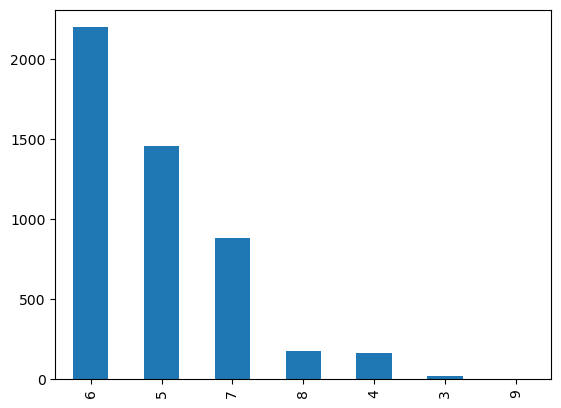

In [10]:
wine_dataset_excel['quality'].value_counts().plot.bar()

![Wine Quality Distribution](assets/Wine_Quality_Distribution_01.png)

### Unique Entries in a Column

In [11]:
print(wine_dataset_excel['quality'].unique())
# array([6, 5, 7, 8, 4, 3, 9])
# we don't have any wines with quality 1,2 or 10
print(wine_dataset_excel['quality'].nunique())
# 7
# in total there are 7 classes

[6 5 7 8 4 3 9]
7


### Selecting Columns

In [12]:
# Select a column to return a PandaSeries
type(wine_dataset_excel['pH'])
wine_dataset_excel['pH']

0       3.00
1       3.30
2       3.26
3       3.19
4       3.19
        ... 
4893    3.27
4894    3.15
4895    2.99
4896    3.34
4897    3.26
Name: pH, Length: 4898, dtype: float64

|    |    |
| -- | -- |
| 0 |    3.00 |
| 1 |    3.30 |
| 2 |    3.26 |
| 3 |    3.19 |
| 4 |    3.19 |
|        ...  |
| 4893 | 3.27 |
| 4894 | 3.15 |
| 4895 | 2.99 |
| 4896 | 3.34 |
| 4897 | 3.26 |

Name: pH, Length: 4898, dtype: float64

In [ ]:
# select only wines with a pH of 2.72
wine_dataset_excel[wine_dataset_excel['pH'] == 2.72]

|  | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 1900 | 10.0 | 0.23 | 0.27 | 14.1 | 0.033 | 45.0 | 166.0 | 0.9988 | 2.72 | 0.43 | 9.7 | 6 |

In [13]:
# select multiple columns
columns = ['pH', 'alcohol']
type(wine_dataset_excel[columns])
wine_dataset_excel[columns]

,pH,alcohol
0,3.00,8.8
1,3.30,9.5
2,3.26,10.1
3,3.19,9.9
4,3.19,9.9
...,...,...
4893,3.27,11.2
4894,3.15,9.6
4895,2.99,9.4
4896,3.34,12.8


|    |  pH  |  alcohol  |
| -- | -- | -- |
| 0 | 3.00 | 8.8 |
| 1 | 3.30 | 9.5 |
| 2 | 3.26 | 10.1 |
| 3 | 3.19 | 9.9 |
| 4 | 3.19 | 9.9 |
| ... |
| 4893 | 3.27 | 11.2 |
| 4894 | 3.15 | 9.6 |
| 4895 | 2.99 | 9.4 |
| 4896 | 3.34 | 12.8 |
| 4897 | 3.26 | 11.8 |

4898 rows × 2 columns
Name: pH, Length: 4898, dtype: float64

In [ ]:
plot = wine_dataset_excel[columns].plot.scatter(
    figsize=(12,8),
    x='pH',
    y='alcohol')

![Scatter Plot multiple columns](assets/Pandas_Scatter_Plot_Multiple_Columns_01.png)

### Renaming Categorical Values

In [14]:
wine_dataset_excel['quality'] = wine_dataset_excel['quality'].replace(
    [10,9,8,7,6,5,4,3,2,1],
    ['A','B','C','D','E','F','G','H','I','J']
)

wine_dataset_excel['quality']

0       E
1       E
2       E
3       E
4       E
       ..
4893    E
4894    F
4895    E
4896    D
4897    E
Name: quality, Length: 4898, dtype: object

|    |    |
| -- | -- |
| 0 | E |
| 1 | E |
| 2 | E |
| 3 | E |
| 4 | E |
| ... |
| 4893 | E |
| 4894 | F |
| 4895 | E |
| 4896 | D |
| 4897 | E |
_Name: quality, Length: 4898, dtype: object_

### Value Mapping

In [ ]:
feature_map = {
    'A':10,
    'B': 9,
    'C': 8,
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

wine_dataset_excel['quality'].map(feature_map)
wine_dataset_excel['quality']

|    |    |
| -- | -- |
| 0 | E |
| 1 | E |
| 2 | E |
| 3 | E |
| 4 | E |
| ... |
| 4893 | E |
| 4894 | F |
| 4895 | E |
| 4896 | D |
| 4897 | E |
_Name: quality, Length: 4898, dtype: object_

### Sorting by Columns

In [ ]:
wine_dataset_excel.sort_values(by='quality', ascending=False, na_position='last')

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 827 | 7.4 | 0.24 | 0.36 | 2.00 | 0.031 | 27.0 | 139.0 | 0.99055 | 3.28 | 0.48 | 12.5 | 9 |
| 1605 | 7.1 | 0.26 | 0.49 | 2.20 | 0.032 | 31.0 | 113.0 | 0.99030 | 3.37 | 0.42 | 12.9 | 9 |
| 876 | 6.9 | 0.36 | 0.34 | 4.20 | 0.018 | 57.0 | 119.0 | 0.98980 | 3.28 | 0.36 | 12.7 | 9 |
| 774 | 9.1 | 0.27 | 0.45 | 10.60 | 0.035 | 28.0 | 124.0 | 0.99700 | 3.20 | 0.46 | 10.4 | 9 |
| 820 | 6.6 | 0.36 | 0.29 | 1.60 | 0.021 | 24.0 | 85.0 | 0.98965 | 3.41 | 0.61 | 12.4 | 9 |
| ... |
| 1484 | 7.5 | 0.32 | 0.24 | 4.60 | 0.053 | 8.0 | 134.0 | 0.99580 | 3.14 | 0.50 | 9.1 | 3 |
| 2373 | 7.6 | 0.48 | 0.37 | 1.20 | 0.034 | 5.0 | 57.0 | 0.99256 | 3.05 | 0.54 | 10.4 | 3 |
| 251 | 8.5 | 0.26 | 0.21 | 16.20 | 0.074 | 41.0 | 197.0 | 0.99800 | 3.02 | 0.50 | 9.8 | 3 |
| 1688 | 6.7 | 0.25 | 0.26 | 1.55 | 0.041 | 118.5 | 216.0 | 0.99490 | 3.55 | 0.63 | 9.4 | 3 |
| 253 | 5.8 | 0.24 | 0.44 | 3.50 | 0.029 | 5.0 | 109.0 | 0.99130 | 3.53 | 0.43 | 11.7 | 3 |

In [ ]:
wine_dataset_excel.sort_values(by=['alcohol', 'residual sugar'], ascending=False, na_position='first')

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 3918 | 6.4 | 0.350 | 0.28 | 1.60 | 0.037 | 31.0 | 113.0 | 0.98779 | 3.12 | 0.40 | 14.20 | 7 |
| 4503 | 5.8 | 0.610 | 0.01 | 8.40 | 0.041 | 31.0 | 104.0 | 0.99090 | 3.26 | 0.72 | 14.05 | 7 |
| 3150 | 5.8 | 0.390 | 0.47 | 7.50 | 0.027 | 12.0 | 88.0 | 0.99070 | 3.38 | 0.45 | 14.00 | 6 |
| 1099 | 5.8 | 0.290 | 0.21 | 2.60 | 0.025 | 12.0 | 120.0 | 0.98940 | 3.39 | 0.79 | 14.00 | 7 |
| 3904 | 5.0 | 0.455 | 0.18 | 1.90 | 0.036 | 33.0 | 106.0 | 0.98746 | 3.21 | 0.83 | 14.00 | 7 |
| ... |
| 4020 | 6.4 | 0.370 | 0.12 | 5.90 | 0.056 | 6.0 | 91.0 | 0.99536 | 3.06 | 0.46 | 8.40 | 4 |
| 3835 | 6.2 | 0.310 | 0.23 | 3.30 | 0.052 | 34.0 | 113.0 | 0.99429 | 3.16 | 0.48 | 8.40 | 5 |
| 3839 | 6.2 | 0.310 | 0.23 | 3.30 | 0.052 | 34.0 | 113.0 | 0.99429 | 3.16 | 0.48 | 8.40 | 5 |
| 3265 | 4.2 | 0.215 | 0.23 | 5.10 | 0.041 | 64.0 | 157.0 | 0.99688 | 3.42 | 0.44 | 8.00 | 3 |
| 2625 | 4.5 | 0.190 | 0.21 | 0.95 | 0.033 | 89.0 | 159.0 | 0.99332 | 3.34 | 0.42 | 8.00 | 5 |

### Find Min/Max Value in Column

In [ ]:
# return max value in column
wine_dataset_excel['total sulfur dioxide'].max()
# 440.0

In [ ]:
# return max value location in column
max_value_location = wine_dataset_excel['total sulfur dioxide'].idxmax()
print(max_value_location)
# 4745
wine_dataset_excel.iloc[max_value_location]

|    |    |
| -- | -- |
| fixed acidity | 6.10000 |
| volatile acidity | 0.26000 |
| citric acid | 0.25000 |
| residual sugar | 2.90000 |
| chlorides | 0.04700 |
| free sulfur dioxide | 289.00000 |
| total sulfur dioxide | 440.00000 |
| density | 0.99314 |
| pH | 3.44000 |
| sulphates | 0.64000 |
| alcohol | 10.50000 |
| quality | 3.00000 |
_Name: 4745, dtype: float64_

In [ ]:
# return min value location in column
min_value_location = wine_dataset_excel['total sulfur dioxide'].idxmin()
print(min_value_location)
# 3710
wine_dataset_excel.iloc[min_value_location]

|    |    |
| -- | -- |
| fixed acidity | 4.70000 |
| volatile acidity | 0.67000 |
| citric acid | 0.09000 |
| residual sugar | 1.00000 |
| chlorides | 0.02000 |
| free sulfur dioxide | 5.00000 |
| total sulfur dioxide | 9.00000 |
| density | 0.98722 |
| pH | 3.30000 |
| sulphates | 0.34000 |
| alcohol | 13.60000 |
| quality | 5.00000 |
_Name: 3710, dtype: float64_

### Adding Columns

In [ ]:
wine_dataset_excel['total acidity'] = wine_dataset_excel['fixed acidity'] + wine_dataset_excel['volatile acidity']
wine_dataset_excel

|    |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | total acidity |
| -- | --              | --                 | --          | --             | --        | --                  | --                   | --      | -- | --        | --      | --      | --            |
| 0 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6 | 7.27 |
| 1 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6 | 6.60 |
| 2 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.99510 | 3.26 | 0.44 | 10.1 | 6 | 8.38 |
| 3 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | 7.43 |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | 7.43 |
| ... |
| 4893 | 6.2 | 0.21 | 0.29 | 1.6 | 0.039 | 24.0 | 92.0 | 0.99114 | 3.27 | 0.50 | 11.2 | 6 | 6.41 |
| 4894 | 6.6 | 0.32 | 0.36 | 8.0 | 0.047 | 57.0 | 168.0 | 0.99490 | 3.15 | 0.46 | 9.6 | 5 | 6.92 |
| 4895 | 6.5 | 0.24 | 0.19 | 1.2 | 0.041 | 30.0 | 111.0 | 0.99254 | 2.99 | 0.46 | 9.4 | 6 | 6.74 |
| 4896 | 5.5 | 0.29 | 0.30 | 1.1 | 0.022 | 20.0 | 110.0 | 0.98869 | 3.34 | 0.38 | 12.8 | 7 | 5.79 |
| 4897 | 6.0 | 0.21 | 0.38 | 0.8 | 0.020 | 22.0 | 98.0 | 0.98941 | 3.26 | 0.32 | 11.8 | 6 | 6.21 |

### Removing Columns

In [ ]:
wine_dataset_excel_dropped = wine_dataset_excel.drop(['total acidity'], axis=1)
wine_dataset_excel_dropped

|    |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | --              | --                 | --          | --             | --        | --                  | --                   | --      | -- | --        | --      | --      |
| 0 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6 |
| 1 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6 |
| 2 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.99510 | 3.26 | 0.44 | 10.1 | 6 |
| 3 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 |
| ... |
| 4893 | 6.2 | 0.21 | 0.29 | 1.6 | 0.039 | 24.0 | 92.0 | 0.99114 | 3.27 | 0.50 | 11.2 | 6 |
| 4894 | 6.6 | 0.32 | 0.36 | 8.0 | 0.047 | 57.0 | 168.0 | 0.99490 | 3.15 | 0.46 | 9.6 | 5 |
| 4895 | 6.5 | 0.24 | 0.19 | 1.2 | 0.041 | 30.0 | 111.0 | 0.99254 | 2.99 | 0.46 | 9.4 | 6 |
| 4896 | 5.5 | 0.29 | 0.30 | 1.1 | 0.022 | 20.0 | 110.0 | 0.98869 | 3.34 | 0.38 | 12.8 | 7 |
| 4897 | 6.0 | 0.21 | 0.38 | 0.8 | 0.020 | 22.0 | 98.0 | 0.98941 | 3.26 | 0.32 | 11.8 | 6 |

## Dataframes Rows

### Setting an Index Column

In [ ]:
# adding an index column
wine_dataset_excel_dropped['index'] = range(1, len(wine_dataset_excel_dropped) + 1)
wine_dataset_excel_dropped.head(2)

|    |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | index |
| -- | --              | --                 | --          | --             | --        | --                  | --                   | --      | -- | --        | --      | --      | --            |
| 0 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6 | 1 |
| 1 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6 | 2 |

In [ ]:
wine_dataset_excel_indexed = wine_dataset_excel_dropped.set_index('index')
wine_dataset_excel_indexed.head(2)

| index |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | --  | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6 |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6 |

In [ ]:
# resetting the index turns index into a regular column again
wine_dataset_excel_indexed.reset_index()

### Selecting Rows

In [ ]:
# select first rows by integer location
wine_dataset_excel_indexed.iloc[0]

|    |    |
| -- | -- |
| fixed acidity | 7.000 |
| volatile acidity | 0.270 |
| citric acid | 0.360 |
| residual sugar | 20.700 |
| chlorides | 0.045 |
| free sulfur dioxide | 45.000 |
| total sulfur dioxide | 170.000 |
| density | 1.001 |
| pH | 3.000 |
| sulphates | 0.450 |
| alcohol | 8.800 |
| quality | 6.000 |

In [ ]:
# select first row by labelled index
wine_dataset_excel_indexed.loc[1]

|    |    |
| -- | -- |
| fixed acidity | 7.000 |
| volatile acidity | 0.270 |
| citric acid | 0.360 |
| residual sugar | 20.700 |
| chlorides | 0.045 |
| free sulfur dioxide | 45.000 |
| total sulfur dioxide | 170.000 |
| density | 1.001 |
| pH | 3.000 |
| sulphates | 0.450 |
| alcohol | 8.800 |
| quality | 6.000 |

In [ ]:
# select multiple rows by iloc
wine_dataset_excel_indexed.iloc[:3]

| index |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | --  | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.0010 | 3.00 | 0.45 | 8.8 | 6 |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.9940 | 3.30 | 0.49 | 9.5 | 6 |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 |

In [ ]:
# select multiple rows by loc
wine_dataset_excel_indexed.loc[[111,222,333]]

| index |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | --  | -- | -- | -- | -- |
| 111 | 6.5 | 0.170 | 0.54 | 8.5 | 0.082 | 64.0 | 163.0 | 0.9959 | 2.89 | 0.39 | 8.8 | 6 |
| 222 | 7.2 | 0.685 | 0.21 | 9.5 | 0.070 | 33.0 | 172.0 | 0.9971 | 3.00 | 0.55 | 9.1 | 6 |
| 333 | 6.3 | 0.230 | 0.30 | 1.8 | 0.033 | 16.0 | 91.0 | 0.9906 | 3.28 | 0.40 | 11.8 | 6 |

### Removing Rows

In [ ]:
wine_dataset_excel_indexed.drop(1, axis=0)

| index |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | --  | -- | -- | -- | -- |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.9940 | 3.30 | 0.49 | 9.5 | 6 |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 |
| ... |

### Inserting Rows

In [ ]:
# copy a row
row_copy = wine_dataset_excel_indexed.iloc[0]

In [ ]:
wine_dataset_excel_indexed.append(row_copy)
# FutureWarning: The frame.append method is deprecated and will be removed
# from pandas in a future version. Use pandas.concat instead.

| index |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | --  | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6.0 |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6.0 |
| ... |
| 4898 | 6.0 | 0.21 | 0.38 | 0.8 | 0.020 | 22.0 | 98.0 | 0.98941 | 3.26 | 0.32 | 11.8 | 6.0 |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6.0 |

In [ ]:
pd.concat([wine_dataset_excel_indexed, row_copy.to_frame().T], ignore_index=False)

| index |  fixed acidity  |  volatile acidity  | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | --  | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6.0 |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6.0 |
| ... |
| 4898 | 6.0 | 0.21 | 0.38 | 0.8 | 0.020 | 22.0 | 98.0 | 0.98941 | 3.26 | 0.32 | 11.8 | 6.0 |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6.0 |

### Removing Duplicated Rows

In [ ]:
# test for duplicated rows
wine_dataset_excel.duplicated()

The 4th row contains a duplicated entry:

|    |    |
| -- | -- |
| 0 | False |
| 1 | False |
| 2 | False |
| 3 | False |
| 4 | True |
| ...  |
| 4893 | False |
| 4894 | False |
| 4895 | False |
| 4896 | False |
| 4897 | False |
_Length: 4898, dtype: bool_

In [ ]:
# remove duplicates
wine_dataset_excel_deduped = wine_dataset_excel.drop_duplicates()
wine_dataset_excel_deduped.shape
# (3961, 12)
# We are down from 4898 to 3961 dropping 937 rows!

### Selecting n-largest / n-smallest

In [ ]:
top_10_wines = wine_dataset_excel.nlargest(10, 'quality')
top_10_wines

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 774 | 9.1 | 0.27 | 0.45 | 10.6 | 0.035 | 28.0 | 124.0 | 0.99700 | 3.20 | 0.46 | 10.4 | 9 |
| 820 | 6.6 | 0.36 | 0.29 | 1.6 | 0.021 | 24.0 | 85.0 | 0.98965 | 3.41 | 0.61 | 12.4 | 9 |
| 827 | 7.4 | 0.24 | 0.36 | 2.0 | 0.031 | 27.0 | 139.0 | 0.99055 | 3.28 | 0.48 | 12.5 | 9 |
| 876 | 6.9 | 0.36 | 0.34 | 4.2 | 0.018 | 57.0 | 119.0 | 0.98980 | 3.28 | 0.36 | 12.7 | 9 |
| 1605 | 7.1 | 0.26 | 0.49 | 2.2 | 0.032 | 31.0 | 113.0 | 0.99030 | 3.37 | 0.42 | 12.9 | 9 |
| 17 | 6.2 | 0.66 | 0.48 | 1.2 | 0.029 | 29.0 | 75.0 | 0.98920 | 3.33 | 0.39 | 12.8 | 8 |
| 20 | 6.2 | 0.66 | 0.48 | 1.2 | 0.029 | 29.0 | 75.0 | 0.98920 | 3.33 | 0.39 | 12.8 | 8 |
| 22 | 6.8 | 0.26 | 0.42 | 1.7 | 0.049 | 41.0 | 122.0 | 0.99300 | 3.47 | 0.48 | 10.5 | 8 |
| 68 | 6.7 | 0.23 | 0.31 | 2.1 | 0.046 | 30.0 | 96.0 | 0.99260 | 3.33 | 0.64 | 10.7 | 8 |
| 74 | 6.7 | 0.23 | 0.31 | 2.1 | 0.046 | 30.0 | 96.0 | 0.99260 | 3.33 | 0.64 | 10.7 | 8 |

In [ ]:
worst_10_wines = wine_dataset_excel.nsmallest(10, 'quality')
worst_10_wines

### Selecting Random Sample

In [ ]:
# sample a fixed number - 2
two_random_wines = wine_dataset_excel.sample(n=2)
two_random_wines

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 3579 | 7.4 | 0.25 | 0.28 | 7.25 | 0.028 | 14.0 | 78.0 | 0.99238 | 2.94 | 0.37 | 11.5 | 7 |
| 2069 | 7.1 | 0.33 | 0.25 | 1.60 | 0.030 | 25.0 | 126.0 | 0.99010 | 3.22 | 0.34 | 12.1 | 7 |

In [ ]:
# sample a percentage - 0.1%
random_wines_01_percent = wine_dataset_excel.sample(frac=0.001)
random_wines_01_percent

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 36 | 6.5 | 0.39 | 0.23 | 5.4 | 0.051 | 25.0 | 149.0 | 0.99340 | 3.24 | 0.35 | 10.0 | 5 |
| 271 | 5.2 | 0.60 | 0.07 | 7.0 | 0.044 | 33.0 | 147.0 | 0.99440 | 3.33 | 0.58 | 9.7 | 5 |
| 3555 | 5.8 | 0.14 | 0.15 | 6.1 | 0.042 | 27.0 | 123.0 | 0.99362 | 3.06 | 0.60 | 9.9 | 6 |
| 1315 | 8.1 | 0.20 | 0.36 | 9.7 | 0.044 | 63.0 | 162.0 | 0.99700 | 3.10 | 0.46 | 10.0 | 6 |
| 222 | 6.2 | 0.25 | 0.25 | 1.4 | 0.030 | 35.0 | 105.0 | 0.99120 | 3.30 | 0.44 | 11.1 | 7 |

In [ ]:
random_wines_01_percent.plot.bar(figsize=(12,8), rot=0)

![Plot Random Sample](assets/Plot_Random_sample_01.png)

### Shuffle Dataset

In [ ]:
# Use the randomizer in sample() to shuffle the entire dataset
random_wines_shuffle = wine_dataset_excel.sample(frac=1)
random_wines_shuffle

| | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour | total acidity |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 2203 | 7.8 | 0.240 | 0.38 | 2.1 | 0.058 | 14.0 | 167.0 | 0.99400 | 3.21 | 0.55 | 9.9 | 5 | False | 8.040 |
| 4294 | 7.4 | 0.220 | 0.28 | 9.0 | 0.046 | 22.0 | 121.0 | 0.99468 | 3.10 | 0.55 | 10.8 | 5 | False | 7.620 |
| 1363 | 6.9 | 0.320 | 0.16 | 1.4 | 0.051 | 15.0 | 96.0 | 0.99400 | 3.22 | 0.38 | 9.5 | 4 | False | 7.220 |
| 3310 | 6.3 | 0.300 | 0.29 | 2.1 | 0.048 | 33.0 | 142.0 | 0.98956 | 3.22 | 0.46 | 12.9 | 7 | False | 6.600 |
| 97 | 8.6 | 0.265 | 0.36 | 1.2 | 0.034 | 15.0 | 80.0 | 0.99130 | 2.95 | 0.36 | 11.4 | 7 | True | 8.865 |
| ... |
| 2294 | 7.0 | 0.320 | 0.31 | 6.4 | 0.031 | 38.0 | 115.0 | 0.99235 | 3.38 | 0.58 | 12.2 | 7 | False | 7.320 |
| 405 | 6.8 | 0.270 | 0.12 | 1.3 | 0.040 | 87.0 | 168.0 | 0.99200 | 3.18 | 0.41 | 10.0 | 5 | False | 7.070 |
| 719 | 7.4 | 0.290 | 0.50 | 1.8 | 0.042 | 35.0 | 127.0 | 0.99370 | 3.45 | 0.50 | 10.2 | 7 | False | 7.690 |
| 2785 | 6.4 | 0.240 | 0.25 | 20.2 | 0.083 | 35.0 | 157.0 | 0.99976 | 3.17 | 0.50 | 9.1 | 5 | False | 6.640 |
| 1666 | 7.8 | 0.445 | 0.56 | 1.0 | 0.040 | 8.0 | 84.0 | 0.99380 | 3.25 | 0.43 | 10.8 | 5 | False | 8.245 |

## Conditional Filtering

In [ ]:
# mark all wines with a pH below 3 as sour
wine_dataset_excel_indexed['really sour'] = wine_dataset_excel_indexed['pH'] < 3.
wine_dataset_excel_indexed.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.0010 | 3.00 | 0.45 | 8.8 | 6 | False |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.9940 | 3.30 | 0.49 | 9.5 | 6 | False |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 | False |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.9956 | 3.19 | 0.40 | 9.9 | 6 | False |
| 5 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.9956 | 3.19 | 0.40 | 9.9 | 6 | False |

### Filter by Value

In [ ]:
# select only rows with a pH value below 3
sour_wines = wine_dataset_excel_indexed[wine_dataset_excel_indexed['pH'] < 3.]
print(sour_wines.shape)
# there are 437 sour wines - (437, 13)
sour_wines.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 11 | 8.1 | 0.270 | 0.41 | 1.45 | 0.033 | 11.0 | 63.0 | 0.9908 | 2.99 | 0.56 | 12.0 | 5 | True |
| 15 | 8.3 | 0.420 | 0.62 | 19.25 | 0.040 | 41.0 | 172.0 | 1.0002 | 2.98 | 0.67 | 9.7 | 5 | True |
| 74 | 8.6 | 0.230 | 0.46 | 1.00 | 0.054 | 9.0 | 72.0 | 0.9941 | 2.95 | 0.49 | 9.1 | 6 | True |
| 79 | 7.4 | 0.180 | 0.30 | 8.80 | 0.064 | 26.0 | 103.0 | 0.9961 | 2.94 | 0.56 | 9.3 | 5 | True |
| 98 | 8.6 | 0.265 | 0.36 | 1.20 | 0.034 | 15.0 | 80.0 | 0.9913 | 2.95 | 0.36 | 11.4 | 7 | True |

In [ ]:
# select only rows that are marked as not sour
not_so_sour_wines = wine_dataset_excel_indexed[wine_dataset_excel_indexed['really sour'] == False]
print(not_so_sour_wines.shape)
# there are 4461 not so sour wines - (4461, 13)
not_so_sour_wines.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.0010 | 3.00 | 0.45 | 8.8 | 6 | False |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.9940 | 3.30 | 0.49 | 9.5 | 6 | False |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 | False |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.9956 | 3.19 | 0.40 | 9.9 | 6 | False |
| 5 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.9956 | 3.19 | 0.40 | 9.9 | 6 | False |

### Filter by Multiple Values

In [ ]:
# select only rows that are marked as not sour AND have a high sugar level
sweet_wines = wine_dataset_excel_indexed[
    (
        wine_dataset_excel_indexed['really sour'] == False
    ) & (
        wine_dataset_excel_indexed['residual sugar'] > 20
    )
]
print(sweet_wines.shape)
# there are 15 sweet wines - (15, 13)
sweet_wines.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.0010 | 3.00 | 0.45 | 8.8 | 6 | False |
| 8 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.0010 | 3.00 | 0.45 | 8.8 | 6 | False |
| 445 | 6.9 | 0.24 | 0.36 | 20.8 | 0.031 | 40.0 | 139.0 | 0.9975 | 3.20 | 0.33 | 11.0 | 6 | False |
| 1654 | 7.9 | 0.33 | 0.28 | 31.6 | 0.053 | 35.0 | 176.0 | 1.0103 | 3.15 | 0.38 | 8.8 | 6 | False |
| 1664 | 7.9 | 0.33 | 0.28 | 31.6 | 0.053 | 35.0 | 176.0 | 1.0103 | 3.15 | 0.38 | 8.8 | 6 | False |

In [ ]:
# select only rows that have extreme total SO2 values OR sugar levels
selected_wines = wine_dataset_excel_indexed[
    (
        wine_dataset_excel_indexed['total sulfur dioxide'] > 250.
    ) | (
        wine_dataset_excel_indexed['residual sugar'] > 30.
    )
]
print(selected_wines.shape)
# (27, 13)
selected_wines.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 112 | 7.2 | 0.27 | 0.46 | 18.75 | 0.052 | 45.0 | 255.0 | 1.0000 | 3.04 | 0.52 | 8.9 | 5 | False |
| 228 | 7.1 | 0.25 | 0.32 | 10.30 | 0.041 | 66.0 | 272.0 | 0.9969 | 3.17 | 0.52 | 9.1 | 6 | False |
| 326 | 7.5 | 0.27 | 0.31 | 5.80 | 0.057 | 131.0 | 313.0 | 0.9946 | 3.18 | 0.59 | 10.5 | 5 | False |
| 388 | 6.3 | 0.39 | 0.35 | 5.90 | 0.040 | 82.5 | 260.0 | 0.9941 | 3.12 | 0.66 | 10.1 | 5 | False |
| 404 | 7.1 | 0.27 | 0.31 | 18.20 | 0.046 | 55.0 | 252.0 | 1.0000 | 3.07 | 0.56 | 8.7 | 5 | False |

### Comparing Columns with Crosstab

In [ ]:
wine_dataset_excel['really sour'] = wine_dataset_excel['pH'] < 3.

# how many wines that are 'really sour' are in each quality class
pd.crosstab(wine_dataset_excel['quality'], wine_dataset_excel['really sour'])

__really sour__

| quality | False | True |
| -- | -- | -- |
| 3 | 16 | 4 |
| 4 | 149 | 14 |
| 5 | 1321 | 136 |
| 6 | 2003 | 195 |
| 7 | 808 | 72 |
| 8 | 159 | 16 |
| 9 | 5 | 0 |

In [ ]:
pd.crosstab(wine_dataset_excel['quality'], wine_dataset_excel['really sour']).plot.bar()

![Pandas Crosstab](assets/Pandas_Crosstab_01.png)

### Filter with isin()

In [ ]:
# select wines with a density of 1.0010 OR 0.9956 inside the dataset
options = [1.0010, 0.9956]

selected_wines_with_selected_density = wine_dataset_excel_indexed[
    wine_dataset_excel_indexed['density'].isin(options)
]
print(selected_wines_with_selected_density.shape)
# (46, 13)
selected_wines_with_selected_density.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 1 	| 7.0 	| 0.27 	| 0.36 	| 20.7 	| 0.045 	| 45.0 	| 170.0 	| 1.0010 	| 3.00 	| 0.45 	| 8.8 	| 6 | False |
| 4 	| 7.2 	| 0.23 	| 0.32 	| 8.5 	| 0.058 	| 47.0 	| 186.0 	| 0.9956 	| 3.19 	| 0.40 	| 9.9 	| 6 | False |
| 5 	| 7.2 	| 0.23 	| 0.32 	| 8.5 	| 0.058 	| 47.0 	| 186.0 	| 0.9956 	| 3.19 	| 0.40 	| 9.9 	| 6 | False |
| 8 	| 7.0 	| 0.27 	| 0.36 	| 20.7 	| 0.045 	| 45.0 	| 170.0 	| 1.0010 	| 3.00 	| 0.45 	| 8.8 	| 6 | False |
| 71 	| 6.2 	| 0.27 	| 0.43 	| 7.8 	| 0.056 	| 48.0 	| 244.0 	| 0.9956 	| 3.10 	| 0.51 	| 9.0 	| 6 | False |

In [ ]:
# select wines that DO NOT have a density of 1.0010 OR 0.9956 inside the dataset
options = [1.0010, 0.9956]

selected_wines_with_selected_density = wine_dataset_excel_indexed[
    ~wine_dataset_excel_indexed['density'].isin(options)
]
print(selected_wines_with_selected_density.shape)
# (4852, 13)
selected_wines_with_selected_density.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.9940 | 3.30 | 0.49 | 9.5 | 6 | False |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 | False |
| 6 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 | False |
| 7 | 6.2 | 0.32 | 0.16 | 7.0 | 0.045 | 30.0 | 136.0 | 0.9949 | 3.18 | 0.47 | 9.6 | 6 | False |
| 9 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.9940 | 3.30 | 0.49 | 9.5 | 6 | False |

### Filter with between()

In [ ]:
# select wines that have a density inbetween 0.9949 OR 0.9951 inside the dataset
selected_wines_with_selected_density = wine_dataset_excel_indexed[
    wine_dataset_excel_indexed['density'].between(0.9949, 0.9951, inclusive='both')
]
print(selected_wines_with_selected_density.shape)
# (105, 13)
selected_wines_with_selected_density.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | really sour |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 | False |
| 6 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.9951 | 3.26 | 0.44 | 10.1 | 6 | False |
| 7 | 6.2 | 0.32 | 0.16 | 7.0 | 0.045 | 30.0 | 136.0 | 0.9949 | 3.18 | 0.47 | 9.6 | 6 | False |
| 25 | 6.6 | 0.27 | 0.41 | 1.3 | 0.052 | 16.0 | 142.0 | 0.9951 | 3.42 | 0.47 | 10.0 | 6 | False |
| 50 | 6.9 | 0.19 | 0.35 | 5.0 | 0.067 | 32.0 | 150.0 | 0.9950 | 3.36 | 0.48 | 9.8 | 5 | False |

### Apply

#### Apply a Custom Method to a Single Column (Pandas Series)

In [ ]:
# custom function to round up a number
def round_it_up(num):
    return np.around(num, decimals=3)

In [ ]:
wine_dataset_excel_indexed['density'].apply(round_it_up)

| index |  |
| -- | -- |
| 1 |    1.001 |
| 2 |    0.994 |
| 3 |    0.995 |
| 4 |    0.996 |
| 5 |    0.996 |
|        ...   |
| 4894 | 0.991 |
| 4895 | 0.995 |
| 4896 | 0.993 |
| 4897 | 0.989 |
| 4898 | 0.989 |
Name: density, Length: 4898, dtype: float64

In [ ]:
# replace values by symbols ↑ → ↓ ←
wine_dataset_excel_indexed['density'].mean()
# 0.9940273764801959

In [ ]:
def rel_average(density):
    if density > 0.9940273764801959:
        return '↑'
    else:
        return '↓'


In [ ]:
wine_dataset_excel_indexed['density average'] = wine_dataset_excel_indexed['density'].apply(rel_average) 
wine_dataset_excel_indexed

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | density average|
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | --| 	
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6 | ↑ |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6 | ↓ |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.99510 | 3.26 | 0.44 | 10.1 | 6 | ↑ |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | ↑ |
| 5 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | ↑ |
| ... |
| 4894 | 6.2 | 0.21 | 0.29 | 1.6 | 0.039 | 24.0 | 92.0 | 0.99114 | 3.27 | 0.50 | 11.2 | 6 | ↓ |
| 4895 | 6.6 | 0.32 | 0.36 | 8.0 | 0.047 | 57.0 | 168.0 | 0.99490 | 3.15 | 0.46 | 9.6 | 5 | ↑ |
| 4896 | 6.5 | 0.24 | 0.19 | 1.2 | 0.041 | 30.0 | 111.0 | 0.99254 | 2.99 | 0.46 | 9.4 | 6 | ↓ |
| 4897 | 5.5 | 0.29 | 0.30 | 1.1 | 0.022 | 20.0 | 110.0 | 0.98869 | 3.34 | 0.38 | 12.8 | 7 | ↓ |
| 4898 | 6.0 | 0.21 | 0.38 | 0.8 | 0.020 | 22.0 | 98.0 | 0.98941 | 3.26 | 0.32 | 11.8 | 6 | ↓ |

#### Apply a Custom Method to Multiple Columns (Pandas Series)
##### Lambda Expression

In [ ]:
# using a lambda expression
## function
def times_two(num):
    return num*2

# lambda
lambda num: num*2

In [ ]:
wine_dataset_excel_indexed['quality'].apply(times_two)

| index |  |
| -- | -- |
| 1 | 12 |
| 2 | 12 |
| 3 | 12 |
| 4 | 12 |
| 5 | 12 |
| ... |
| 4894 | 12 |
| 4895 | 10 |
| 4896 | 12 |
| 4897 | 14 |
| 4898 | 12 |

In [ ]:
wine_dataset_excel_indexed['quality'].apply(lambda num: num*2)

| index |  |
| -- | -- |
| 1 | 12 |
| 2 | 12 |
| 3 | 12 |
| 4 | 12 |
| 5 | 12 |
| ... |
| 4894 | 12 |
| 4895 | 10 |
| 4896 | 12 |
| 4897 | 14 |
| 4898 | 12 |

In [ ]:
def sweetness(fixed_acidity, volantile_acidity, citric_acid, residual_sugar):
    if (fixed_acidity+volantile_acidity+citric_acid)/residual_sugar > 0.38:
        return "sweet"
    else:
        return "dry"

In [ ]:
wine_dataset_excel_indexed['sweetness'] = wine_dataset_excel_indexed[[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar'
]].apply(
    lambda wine_dataset_excel_indexed: sweetness(
        wine_dataset_excel_indexed['fixed acidity'],
        wine_dataset_excel_indexed['volatile acidity'],
        wine_dataset_excel_indexed['citric acid'],
        wine_dataset_excel_indexed['residual sugar']
    ), axis=1
)

wine_dataset_excel_indexed

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | density average | sweetness |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6 | ↑ | dry |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6 | ↓ | sweet |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.99510 | 3.26 | 0.44 | 10.1 | 6 | ↑ | sweet |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | ↑ | sweet |
| 5 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | ↑ | sweet |
| ... |
| 4894 | 6.2 | 0.21 | 0.29 | 1.6 | 0.039 | 24.0 | 92.0 | 0.99114 | 3.27 | 0.50 | 11.2 | 6 | ↓ | sweet |
| 4895 | 6.6 | 0.32 | 0.36 | 8.0 | 0.047 | 57.0 | 168.0 | 0.99490 | 3.15 | 0.46 | 9.6 | 5 | ↑ | sweet |
| 4896 | 6.5 | 0.24 | 0.19 | 1.2 | 0.041 | 30.0 | 111.0 | 0.99254 | 2.99 | 0.46 | 9.4 | 6 | ↓ | sweet |
| 4897 | 5.5 | 0.29 | 0.30 | 1.1 | 0.022 | 20.0 | 110.0 | 0.98869 | 3.34 | 0.38 | 12.8 | 7 | ↓ | sweet |
| 4898 | 6.0 | 0.21 | 0.38 | 0.8 | 0.020 | 22.0 | 98.0 | 0.98941 | 3.26 | 0.32 | 11.8 | 6 | ↓ | sweet |

##### Numpy Vectorize

Using Numpy Vectorize to [speed things up](https://stackoverflow.com/questions/52673285/performance-of-pandas-apply-vs-np-vectorize-to-create-new-column-from-existing-c):

In [ ]:
wine_dataset_excel_indexed['sweetness'] = np.vectorize(sweetness)(
        wine_dataset_excel_indexed['fixed acidity'],
        wine_dataset_excel_indexed['volatile acidity'],
        wine_dataset_excel_indexed['citric acid'],
        wine_dataset_excel_indexed['residual sugar']
)

wine_dataset_excel_indexed.head(5)

| index | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | density average | sweetness |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 1 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6 | ↑ | dry |
| 2 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6 | ↓ | sweet |
| 3 | 8.1 | 0.28 | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.99510 | 3.26 | 0.44 | 10.1 | 6 | ↑ | sweet |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | ↑ | sweet |
| 5 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6 | ↑ | sweet |

## Detect Missing Data

In [ ]:
print(pd.NA is pd.NA)
print(np.nan is np.nan)
# True
# True

In [ ]:
df_missing = pd.read_csv('datasets/wine-quality-missing.csv')
df_missing

| | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 7.0 | 0.27 | 0.36 | 20.7 | 0.045 | 45.0 | 170.0 | 1.00100 | 3.00 | 0.45 | 8.8 | 6.0 |
| 1 | 6.3 | 0.30 | 0.34 | 1.6 | 0.049 | 14.0 | 132.0 | 0.99400 | 3.30 | 0.49 | 9.5 | 6.0 |
| 2 | 8.1 | NaN | 0.40 | 6.9 | 0.050 | 30.0 | 97.0 | 0.99510 | 3.26 | 0.44 | 10.1 | 6.0 |
| 3 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6.0 |
| 4 | 7.2 | 0.23 | 0.32 | 8.5 | 0.058 | 47.0 | 186.0 | 0.99560 | 3.19 | 0.40 | 9.9 | 6.0 |
| ... |
| 4894 | 6.6 | 0.32 | 0.36 | 8.0 | 0.047 | 57.0 | 168.0 | 0.99490 | 3.15 | 0.46 | 9.6 | 5.0 |
| 4895 | 6.5 | 0.24 | 0.19 | 1.2 | 0.041 | 30.0 | 111.0 | 0.99254 | 2.99 | 0.46 | 9.4 | 6.0 |
| 4896 | 5.5 | 0.29 | 0.30 | 1.1 | 0.022 | 20.0 | 110.0 | 0.98869 | 3.34 | 0.38 | 12.8 | 7.0 |
| 4897 | 6.0 | 0.21 | 0.38 | 0.8 | 0.020 | 22.0 | 98.0 | 0.98941 | 3.26 | 0.32 | 11.8 | 6.0 |
| 4898 | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN |

In [ ]:
df_missing.isna()

| | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | False | False | False | False | False | False | False | False | False | False | False | False |
| 1 | False | False | False | False | False | False | False | False | False | False | False | False |
| 2 | False | True | False | False | False | False | False | False | False | False | False | False |
| 3 | False | False | False | False | False | False | False | False | False | False | False | False |
| 4 | False | False | False | False | False | False | False | False | False | False | False | False |
| ... |
| 4894 | False | False | False | False | False | False | False | False | False | False | False | False |
| 4895 | False | False | False | False | False | False | False | False | False | False | False | False |
| 4896 | False | False | False | False | False | False | False | False | False | False | False | False |
| 4897 | False | False | False | False | False | False | False | False | False | False | False | False |
| 4898 | True | True | True | True | True | True | True | True | True | True | True | True |

In [ ]:
df_missing.notna()

| | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | True | True | True | True | True | True | True | True | True | True | True | True |
| 1 | True | True | True | True | True | True | True | True | True | True | True | True |
| 2 | True | False | True | True | True | True | True | True | True | True | True | True |
| 3 | True | True | True | True | True | True | True | True | True | True | True | True |
| 4 | True | True | True | True | True | True | True | True | True | True | True | True |
| ... |
| 4894 | True | True | True | True | True | True | True | True | True | True | True | True |
| 4895 | True | True | True | True | True | True | True | True | True | True | True | True |
| 4896 | True | True | True | True | True | True | True | True | True | True | True | True |
| 4897 | True | True | True | True | True | True | True | True | True | True | True | True |
| 4898 | False | False | False | False | False | False | False | False | False | False | False | False |

In [ ]:
# only show wines that do not have a quality score
df[df_missing['quality'].isna()]

| | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 134 | 6.8 | 0.270 | 0.22 | 8.1 | 0.034 | 55.0 | 203.0 | 0.99610 | 3.19 | 0.52 | 8.9 | NaN |
| 145 | 6.3 | 0.255 | 0.37 | 1.1 | 0.040 | 37.0 | 114.0 | 0.99050 | 3.00 | 0.39 | 10.9 | NaN |
| 193 | 6.6 | 0.150 | 0.34 | 5.1 | 0.055 | 34.0 | 125.0 | 0.99420 | 3.36 | 0.42 | 9.6 | NaN |
| 296 | 8.3 | 0.390 | 0.70 | 10.6 | 0.045 | 33.0 | 169.0 | 0.99760 | 3.09 | 0.57 | 9.4 | NaN |
| 932 | 6.5 | 0.260 | 0.28 | 12.5 | 0.046 | 80.0 | 225.0 | 0.99685 | 3.18 | 0.41 | 10.0 | NaN |
| 4898 | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN |

In [ ]:
# search for multiple null values
df[(df_missing['free sulfur dioxide'].isna()) & (df_missing['total sulfur dioxide'].isna())]

| | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 36 | 6.5 | NaN | NaN | NaN | NaN | NaN | NaN | NaN | 3.24 | 0.35 | 10.0 | 5.0 |
| 4898 | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN | NaN |

### Drop Missing Data

In [ ]:
# drop all rows that have less than 7 non-null values
df_missing.dropna(axis='rows', thresh=7)
# drop only rows that miss ALL data points
df_missing.dropna(how='all')
# only drop rows that have missing values in specified volumns
df_missing.dropna(subset=['pH', 'alcohol'])

### Fill Missing Data

In [ ]:
# fill all missing values with `0`
df_missing.fillna(value=0)
# fill all missing values with `0` in a specified row
df_missing['pH'] = df_missing['pH'].fillna(value=0)
# use different fills per column
values = {
    "fixed acidity": 0,
    "volatile acidity": 0,
    "citric acid": 0,
    "residual sugar": 0,
    "chlorides": 0,
    "free sulfur dioxide": 0,
    "total sulfur dioxide": 0,
    "density": 0,
    "pH": 0,
    "sulphates": 0,
    "alcohol": 0,
    "quality": 'Not Evaluated',
}
df_missing.fillna(value=values)
# only drop rows that have missing values in specified volumns
df_missing.dropna(subset=['pH', 'alcohol'])

In [ ]:
# fill missing data with average values
df_missing['chlorides'] = df_missing['chlorides'].fillna(df_missing['chlorides'].mean())

## GroupBy

In [ ]:
# group all wines with the same quality
# and display the mean values
wine_dataset.groupby('quality').mean()

| quality | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 3 | 7.600000 | 0.333250 | 0.336000 | 6.392500 | 0.054300 | 53.325000 | 170.600000 | 0.994884 | 3.187500 | 0.474500 | 10.345000 |
| 4 | 7.129448 | 0.381227 | 0.304233 | 4.628221 | 0.050098 | 23.358896 | 125.279141 | 0.994277 | 3.182883 | 0.476135 | 10.152454 |
| 5 | 6.933974 | 0.302011 | 0.337653 | 7.334969 | 0.051546 | 36.432052 | 150.904598 | 0.995263 | 3.168833 | 0.482203 | 9.808840 |
| 6 | 6.837671 | 0.260564 | 0.338025 | 6.441606 | 0.045217 | 35.650591 | 137.047316 | 0.993961 | 3.188599 | 0.491106 | 10.575372 |
| 7 | 6.734716 | 0.262767 | 0.325625 | 5.186477 | 0.038191 | 34.125568 | 125.114773 | 0.992452 | 3.213898 | 0.503102 | 11.367936 |
| 8 | 6.657143 | 0.277400 | 0.326514 | 5.671429 | 0.038314 | 36.720000 | 126.165714 | 0.992236 | 3.218686 | 0.486229 | 11.636000 |
| 9 | 7.420000 | 0.298000 | 0.386000 | 4.120000 | 0.027400 | 33.400000 | 116.000000 | 0.991460 | 3.308000 | 0.466000 | 12.180000 |

In [ ]:
# only return the mean values of one colums as a pd series
wine_dataset.groupby('quality').mean()['total sulfur dioxide']

| quality |  |
| -- | -- |
| 3 | 170.600000 |
| 4 | 125.279141 |
| 5 | 150.904598 |
| 6 | 137.047316 |
| 7 | 125.114773 |
| 8 | 126.165714 |
| 9 | 116.000000 |
_Name: total sulfur dioxide, dtype: float64_

### GroupBy Multi-Index

In [ ]:
# group by multiple features
quality_tsd = wine_dataset.groupby(['quality','total sulfur dioxide']).mean()
quality_tsd

| quality | total sulfur dioxide | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 3 | 19.0 | 6.9 | 0.39 | 0.40 | 4.60 | 0.022 | 5.0 | 0.99150 | 3.31 | 0.37 | 12.6 |
|   | 33.0 | 10.3 | 0.17 | 0.47 | 1.40 | 0.037 | 5.0 | 0.99390 | 2.89 | 0.28 | 9.6 |
|   | 57.0 | 7.6 | 0.48 | 0.37 | 1.20 | 0.034 | 5.0 | 0.99256 | 3.05 | 0.54 | 10.4 |
|   | 66.0 | 7.1 | 0.32 | 0.32 | 11.00 | 0.038 | 16.0 | 0.99370 | 3.24 | 0.40 | 11.5 |
|   | 96.0 | 8.3 | 0.33 | 0.42 | 1.15 | 0.033 | 18.0 | 0.99110 | 3.20 | 0.32 | 12.4 |
| ... |
| 9 | 85.0 | 6.6 | 0.36 | 0.29 | 1.60 | 0.021 | 24.0 | 0.98965 | 3.41 | 0.61 | 12.4 |
|   | 113.0 | 7.1 | 0.26 | 0.49 | 2.20 | 0.032 | 31.0 | 0.99030 | 3.37 | 0.42 | 12.9 |
|   | 119.0 | 6.9 | 0.36 | 0.34 | 4.20 | 0.018 | 57.0 | 0.98980 | 3.28 | 0.36 | 12.7 |
|   | 124.0 | 9.1 | 0.27 | 0.45 | 10.60 | 0.035 | 28.0 | 0.99700 | 3.20 | 0.46 | 10.4 |
|   | 139.0 | 7.4 | 0.24 | 0.36 | 2.00 | 0.031 | 27.0 | 0.99055 | 3.28 | 0.48 | 12.5 |

In [ ]:
quality_tsd.swaplevel()

| total sulfur dioxide | quality | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 19.0 | 3 | 6.9 | 0.39 | 0.40 | 4.60 | 0.022 | 5.0 | 0.99150 | 3.31 | 0.37 | 12.6 |
| 33.0 | 3 | 10.3 | 0.17 | 0.47 | 1.40 | 0.037 | 5.0 | 0.99390 | 2.89 | 0.28 | 9.6 |
| 57.0 | 3 | 7.6 | 0.48 | 0.37 | 1.20 | 0.034 | 5.0 | 0.99256 | 3.05 | 0.54 | 10.4 |
| 66.0 | 3 | 7.1 | 0.32 | 0.32 | 11.00 | 0.038 | 16.0 | 0.99370 | 3.24 | 0.40 | 11.5 |
| 96.0 | 3 | 8.3 | 0.33 | 0.42 | 1.15 | 0.033 | 18.0 | 0.99110 | 3.20 | 0.32 | 12.4 |
| ... |
| 85.0 | 9 | 6.6 | 0.36 | 0.29 | 1.60 | 0.021 | 24.0 | 0.98965 | 3.41 | 0.61 | 12.4 |
| 113.0 | 9 | 7.1 | 0.26 | 0.49 | 2.20 | 0.032 | 31.0 | 0.99030 | 3.37 | 0.42 | 12.9 |
| 119.0 | 9 | 6.9 | 0.36 | 0.34 | 4.20 | 0.018 | 57.0 | 0.98980 | 3.28 | 0.36 | 12.7 |
| 124.0 | 9 | 9.1 | 0.27 | 0.45 | 10.60 | 0.035 | 28.0 | 0.99700 | 3.20 | 0.46 | 10.4 |
| 139.0 | 9 | 7.4 | 0.24 | 0.36 | 2.00 | 0.031 | 27.0 | 0.99055 | 3.28 | 0.48 | 12.5 |

In [ ]:
quality_tsd.swaplevel().sort_index(level='total sulfur dioxide', ascending=False)

| total sulfur dioxide | quality | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 440.0 | 3 | 6.1 | 0.26 | 0.25 | 2.90 | 0.047 | 289.0 | 0.99314 | 3.44 | 0.64 | 10.5 |
| 366.5 | 3 | 8.6 | 0.55 | 0.35 | 15.55 | 0.057 | 35.5 | 1.00010 | 3.04 | 0.63 | 11.0 |
| 344.0 | 5 | 9.1 | 0.33 | 0.38 | 1.70 | 0.062 | 50.5 | 0.99580 | 3.10 | 0.70 | 9.5 |
| 313.0 | 5 | 7.5 | 0.27 | 0.31 | 5.80 | 0.057 | 131.0 | 0.99460 | 3.18 | 0.59 | 10.5 |
| 307.5 | 3 | 7.1 | 0.49 | 0.22 | 2.00 | 0.047 | 146.5 | 0.99240 | 3.24 | 0.37 | 11.0 |
| ... |
| 21.0 | 5 | 5.9 | 0.19 | 0.37 | 0.80 | 0.027 | 3.0 | 0.98970 | 3.09 | 0.31 | 10.8 |
| 19.0 | 3 | 6.9 | 0.39 | 0.40 | 4.60 | 0.022 | 5.0 | 0.99150 | 3.31 | 0.37 | 12.6 |
| 18.0 | 6 | 9.7 | 0.24 | 0.49 | 4.90 | 0.032 | 3.0 | 0.99368 | 2.85 | 0.54 | 10.0 |
| 10.0 | 4 | 4.8 | 0.65 | 0.12 | 1.10 | 0.013 | 4.0 | 0.99246 | 3.32 | 0.36 | 13.5 |
| 9.0 | 5 | 4.7 | 0.67 | 0.09 | 1.00 | 0.020 | 5.0 | 0.98722 | 3.30 | 0.34 | 13.6 |

In [ ]:
wine_dataset.groupby(['quality','total sulfur dioxide']).describe().transpose()

In [ ]:
# show hierarchical indices [quality, total sulfur dioxide]
quality_tsd.index.levels
# FrozenList([[3, 4, 5, 6, 7, 8, 9], [9.0, 10.0, 18.0, 19.0, 21.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 33.0, 34.0, 37.0, 40.0, 41.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 115.5, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, ...]])

In [ ]:
# only show where quality is 9
quality_tsd.loc[9]

| total sulfur dioxide | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 85.0 | 6.6 | 0.36 | 0.29 | 1.6 | 0.021 | 24.0 | 0.98965 | 3.41 | 0.61 | 12.4 |
| 113.0 | 7.1 | 0.26 | 0.49 | 2.2 | 0.032 | 31.0 | 0.99030 | 3.37 | 0.42 | 12.9 |
| 119.0 | 6.9 | 0.36 | 0.34 | 4.2 | 0.018 | 57.0 | 0.98980 | 3.28 | 0.36 | 12.7 |
| 124.0 | 9.1 | 0.27 | 0.45 | 10.6 | 0.035 | 28.0 | 0.99700 | 3.20 | 0.46 | 10.4 |
| 139.0 | 7.4 | 0.24 | 0.36 | 2.0 | 0.031 | 27.0 | 0.99055 | 3.28 | 0.48 | 12.5 |

In [ ]:
# only show where quality is 3 or 4
quality_tsd.loc[[3, 4]]

| quality | total sulfur dioxide | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 3 | 19.0 | 6.9 | 0.390 | 0.40 | 4.60 | 0.022 | 5.0 | 0.99150 | 3.31 | 0.37 | 12.6 |
|   | 33.0 | 10.3 | 0.170 | 0.47 | 1.40 | 0.037 | 5.0 | 0.99390 | 2.89 | 0.28 | 9.6 |
|   | 57.0 | 7.6 | 0.480 | 0.37 | 1.20 | 0.034 | 5.0 | 0.99256 | 3.05 | 0.54 | 10.4 |
|   | 66.0 | 7.1 | 0.320 | 0.32 | 11.00 | 0.038 | 16.0 | 0.99370 | 3.24 | 0.40 | 11.5 |
|   | 96.0 | 8.3 | 0.330 | 0.42 | 1.15 | 0.033 | 18.0 | 0.99110 | 3.20 | 0.32 | 12.4 |
| ... |
| 4 | 225.0 | 9.8 | 0.250 | 0.74 | 10.00 | 0.056 | 36.0 | 0.99770 | 3.06 | 0.43 | 10.0 |
|   | 233.0 | 8.0 | 0.660 | 0.72 | 17.55 | 0.042 | 62.0 | 0.99990 | 2.92 | 0.68 | 9.4 |
|   | 234.5 | 6.8 | 0.290 | 0.16 | 1.40 | 0.038 | 122.5 | 0.99220 | 3.15 | 0.47 | 10.0 |
|   | 245.0 | 6.3 | 0.600 | 0.44 | 11.00 | 0.050 | 50.0 | 0.99720 | 3.19 | 0.57 | 9.3 |
|   | 272.0 | 6.2 | 0.255 | 0.24 | 1.70 | 0.039 | 138.5 | 0.99452 | 3.53 | 0.53 | 9.6 |

In [ ]:
quality_tsd.index

```
MultiIndex([(3,  19.0),
            (3,  33.0),
            (3,  57.0),
            (3,  66.0),
            (3,  96.0),
            (3, 109.0),
            (3, 111.0),
            (3, 123.0),
            (3, 134.0),
            (3, 157.0),
            ...
            (8, 179.0),
            (8, 180.0),
            (8, 186.0),
            (8, 188.0),
            (8, 212.5),
            (9,  85.0),
            (9, 113.0),
            (9, 119.0),
            (9, 124.0),
            (9, 139.0)],
           names=['quality', 'total sulfur dioxide'], length=777)
```

In [ ]:
# only show averages for wines of aquality of 3 and tsd average is 111.0
quality_tsd.loc[(3, 111.)]


|  |  |
| -- | -- |
| fixed acidity | 6.2000 |
| volatile acidity | 0.2300 |
| citric acid | 0.3500 |
| residual sugar | 0.7000 |
| chlorides | 0.0510 |
| free sulfur dioxide | 24.0000 |
| density | 0.9916 |
| pH | 3.3700 |
| sulphates | 0.4300 |
| alcohol | 11.0000 |
_Name: (3, 111.0), dtype: float64_

### Multi-Index Cross-Section

In [ ]:
# cross-section - get all wines with quality 9
quality_tsd.xs(key=9, level='quality')

| total sulfur dioxide | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 85.0 | 6.6 | 0.36 | 0.29 | 1.6 | 0.021 | 24.0 | 0.98965 | 3.41 | 0.61 | 12.4 |
| 113.0 | 7.1 | 0.26 | 0.49 | 2.2 | 0.032 | 31.0 | 0.99030 | 3.37 | 0.42 | 12.9 |
| 119.0 | 6.9 | 0.36 | 0.34 | 4.2 | 0.018 | 57.0 | 0.98980 | 3.28 | 0.36 | 12.7 |
| 124.0 | 9.1 | 0.27 | 0.45 | 10.6 | 0.035 | 28.0 | 0.99700 | 3.20 | 0.46 | 10.4 |
| 139.0 | 7.4 | 0.24 | 0.36 | 2.0 | 0.031 | 27.0 | 0.99055 | 3.28 | 0.48 | 12.5 |

In [ ]:
# cross-section - get all wines with tsd = 124
quality_tsd.xs(key=124., level='total sulfur dioxide')

| quality | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 4 | 8.450000 | 0.330000 | 0.550000 | 3.700000 | 0.043500 | 12.500000 | 0.993890 | 3.045000 | 0.440000 | 10.550000 |
| 5 | 6.661538 | 0.274615 | 0.309231 | 9.638462 | 0.044769 | 23.538462 | 0.995772 | 3.161538 | 0.496923 | 10.015385 |
| 6 | 6.826087 | 0.284783 | 0.327826 | 5.917391 | 0.043826 | 28.565217 | 0.993708 | 3.163478 | 0.446522 | 10.534783 |
| 7 | 6.616667 | 0.285000 | 0.295833 | 5.333333 | 0.037500 | 36.750000 | 0.991735 | 3.165833 | 0.517500 | 11.841667 |
| 8 | 6.900000 | 0.290000 | 0.365000 | 4.800000 | 0.036000 | 34.500000 | 0.991015 | 3.135000 | 0.375000 | 12.300000 |
| 9 | 9.100000 | 0.270000 | 0.450000 | 10.600000 | 0.035000 | 28.000000 | 0.997000 | 3.200000 | 0.460000 | 10.400000 |

In [ ]:
# pre-select only wines with a pH value between 3.0-3.1
# and then group by quality and tsd
wine_dataset[wine_dataset['pH'].isin([3.0, 3.1])].groupby(['quality','total sulfur dioxide']).mean()

| quality | total sulfur dioxide | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | density | pH | sulphates | alcohol |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 4 | 95.0 | 6.000000 | 0.590000 | 0.000000 | 0.80 | 0.037 | 30.000000 | 0.990320 | 3.100000 | 0.40 | 10.900000 |
|  | 102.0 | 7.033333 | 0.393333 | 0.223333 | 5.00 | 0.037 | 12.666667 | 0.993013 | 3.033333 | 0.76 | 11.466667 |
|  | 106.0 | 8.500000 | 0.200000 | 0.400000 | 1.10 | 0.046 | 31.000000 | 0.991940 | 3.000000 | 0.35 | 10.500000 |
|  | 107.0 | 9.200000 | 0.160000 | 0.490000 | 2.00 | 0.044 | 18.000000 | 0.995140 | 3.100000 | 0.53 | 10.200000 |
|  | 111.0 | 6.500000 | 0.290000 | 0.250000 | 2.50 | 0.142 | 8.000000 | 0.992700 | 3.000000 | 0.44 | 9.900000 |
| ... |
| 7 | 171.0 | 6.800000 | 0.180000 | 0.300000 | 12.80 | 0.062 | 19.000000 | 0.998080 | 3.000000 | 0.52 | 9.000000 |
|  | 174.0 | 8.100000 | 0.300000 | 0.490000 | 8.10 | 0.037 | 26.000000 | 0.994300 | 3.100000 | 0.30 | 11.200000 |
|  | 189.0 | 6.900000 | 0.360000 | 0.280000 | 13.55 | 0.048 | 51.000000 | 0.997820 | 3.000000 | 0.60 | 9.500000 |
|  | 193.0 | 7.600000 | 0.190000 | 0.320000 | 18.75 | 0.047 | 32.000000 | 1.000140 | 3.100000 | 0.50 | 9.300000 |
| 8 | 125.0 | 6.900000 | 0.360000 | 0.350000 | 8.60 | 0.038 | 37.000000 | 0.991600 | 3.000000 | 0.32 | 12.400000 |

## Aggregation

In [ ]:
# return std deviation minimum/maximum values
wine_dataset.agg(['std', 'min', 'max'], axis='rows')

|     | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality |
| --  | --       | --       | --      | --       | --       | --        | --        | --       | --       | --       | --       | --       |
| std | 0.843868 | 0.100795 | 0.12102 | 5.072058 | 0.021848 | 17.007137 | 42.498065 | 0.002991 | 0.151001 | 0.114126 | 1.230621 | 0.885639 |
| min | 3.800000 | 0.080000 | 0.00000 | 0.600000 | 0.009000 | 2.000000 | 9.000000 | 0.987110 | 2.720000 | 0.220000 | 8.000000 | 3.000000 |
| max | 14.200000 | 1.100000 | 1.66000 | 65.800000 | 0.346000 | 289.000000 | 440.000000 | 1.038980 | 3.820000 | 1.080000 | 14.200000 | 9.000000 |

In [ ]:
# return std deviation, mean and minimum/maximum values for selected columns
wine_dataset.agg({'fixed acidity' : ['std', 'min'], 'citric acid' : ['std', 'mean']}, axis='rows')

|  | fixed acidity | citric acid |
| -- | -- | -- |
| std | 0.843868 | 0.121020 |
| min | 3.800000 | NaN |
| mean | NaN | 0.334192 |

## Combining Dataframes

### Concatenation

#### By Rows

In [ ]:
data_one = { 'A': ['A0', 'A1', 'A2', 'A3', 'A4'], 'B': ['B0', 'B1', 'B2', 'B3', 'B4']}
data_two = { 'C': ['C0', 'C1', 'C2', 'C3', 'C4'], 'D': ['D0', 'D1', 'D2', 'D3', 'D4']}

In [ ]:
one_df = pd.DataFrame(data_one)
two_df = pd.DataFrame(data_two)

In [ ]:
pd.concat([one_df, two_df], axis=1)

|  | A | B | C | D |
| -- | -- | -- | -- | -- |
| 0 | A0 | B0 | C0 | D0 |
| 1 | A1 | B1 | C1 | D1 |
| 2 | A2 | B2 | C2 | D2 |
| 3 | A3 | B3 | C3 | D3 |
| 4 | A4 | B4 | C4 | D4 |

#### By Columns

In [ ]:
data_three = { 'A': ['A0', 'A1', 'A2', 'A3', 'A4'], 'B': ['B0', 'B1', 'B2', 'B3', 'B4']}
data_four = { 'A': ['A5', 'A6', 'A7', 'A8', 'A9'], 'B': ['B5', 'B6', 'B7', 'B8', 'B9']}

In [ ]:
three_df = pd.DataFrame(data_three)
four_df = pd.DataFrame(data_four)

In [ ]:
pd.concat([three_df, four_df], axis=0, ignore_index=True)

|  | A | B |
| -- | -- | -- |
| 0 | A0 | B0 |
| 1 | A1 | B1 |
| 2 | A2 | B2 |
| 3 | A3 | B3 |
| 4 | A4 | B4 |
| 5 | A5 | B5 |
| 6 | A6 | B6 |
| 7 | A7 | B7 |
| 8 | A8 | B8 |
| 9 | A9 | B9 |

### Merge

#### Inner Join

In [ ]:
registration_data = {
    'reg_id': ['1', '2', '3', '4'],
    'name': ['Manfred', 'Kurt', 'Vasili', 'Cassandra']
}

login_data = {
    'log_id': ['1', '2', '3', '4'],
    'name': ['Chantal', 'Manfred', 'Cassandra', 'Andrew']
}

In [ ]:
reg_df = pd.DataFrame(registration_data)
log_df = pd.DataFrame(login_data)

In [ ]:
# only select names that are present in both tables and merge
pd.merge(reg_df, log_df, how='inner', on='name')

|  | reg_id | name | log_id |
| -- | -- | -- | -- |
| 0 | 1 | Manfred | 2 |
| 1 | 4 | Cassandra | 3 |

#### Outer Join

In [ ]:
# merge all
pd.merge(reg_df, log_df, how='outer', on='name')

|  | reg_id | name | log_id |
| -- | -- | -- | -- |
| 0 | 1 | Manfred | 2 |
| 1 | 2 | Kurt | NaN |
| 2 | 3 | Vasili | NaN |
| 3 | 4 | Cassandra | 3 |
| 4 | NaN | Chantal | 1 |
| 5 | NaN | Andrew | 4 |

#### Left Join

In [ ]:
# merge left
pd.merge(reg_df, log_df, how='left', on='name')

|  | reg_id | name | log_id |
| -- | -- | -- | -- |
| 0 | 1 | Manfred | 2 |
| 1 | 2 | Kurt | NaN |
| 2 | 3 | Vasili | NaN |
| 3 | 4 | Cassandra | 3 |

In [ ]:
# merge left / swapped df input
pd.merge(log_df, reg_df, how='left', on='name')

|  | log_id | name | reg_id |
| -- | -- | -- | -- |
| 0 | 1 | Chantal | NaN |
| 1 | 2 | Manfred | 1 |
| 2 | 3 | Cassandra | 4 |
| 3 | 4 | Andrew | NaN |

#### Right Join

In [ ]:
# merge right
pd.merge(reg_df, log_df, how='right', on='name')

|  | reg_id | name | log_id |
| -- | -- | -- | -- |
| 0 | NaN | Chantal | 1 |
| 1 | 1 | Manfred | 2 |
| 2 | 4 | Cassandra | 3 |
| 3 | NaN | Andrew | 4 |

In [ ]:
# merge right / swapped df input
pd.merge(log_df, reg_df, how='right', on='name')

|  | log_id | name | reg_id |
| -- | -- | -- | -- |
| 0 | 2 | Manfred | 1 |
| 1 | NaN | Kurt | 2 |
| 2 | NaN | Vasili | 3 |
| 3 | 3 | Cassandra | 4 |

#### Join by left_on / right_on

In [ ]:
registration_data = {
    'reg_id': ['1', '2', '3', '4'],
    'name': ['Manfred', 'Kurt', 'Vasili', 'Cassandra']
}

login_data = {
    'log_id': ['1', '2', '3', '4'],
    'user': ['Chantal', 'Manfred', 'Cassandra', 'Andrew']
}

In [ ]:
reg_df = pd.DataFrame(registration_data)
log_df = pd.DataFrame(login_data)

In [ ]:
# merge on different columns
pd.merge(reg_df, log_df, how='inner', left_on='name', right_on='user').set_index('user')

| user | reg_id | log_id |
| -- | -- | -- |
| Manfred | 1 | 2 |
| Cassandra | 4 | 3 |

#### Join Suffixes

In [ ]:
registration_data = {
    'id': ['1', '2', '3', '4'],
    'name': ['Manfred', 'Kurt', 'Vasili', 'Cassandra']
}

login_data = {
    'id': ['1', '2', '3', '4'],
    'name': ['Chantal', 'Manfred', 'Cassandra', 'Andrew']
}

In [ ]:
reg_df = pd.DataFrame(registration_data)
log_df = pd.DataFrame(login_data)

In [ ]:
pd.merge(reg_df, log_df , how='inner', on='name', suffixes=('_reg', '_log'))

|    | id_reg | name | id_log |
| -- | -- | -- | -- |
| 0 | 1 | Manfred | 2 |
| 1 | 4 | Cassandra | 3 |

## String Method

In [ ]:
email = 'jl-picard@starfleet.com'
email.split('@')[0]
# 'jl-picard'

### Pandas Str()

In [ ]:
names = pd.Series(['Data', 'Geordie', 'Deanna', 'Worf', 'Riker', 'Beverly', '7'])
names.str.isdigit()

|    |    |
| -- | -- |
| 0 | False |
| 1 | False |
| 2 | False |
| 3 | False |
| 4 | False |
| 5 | False |
| 6 |  True |
_dtype: bool_

In [ ]:
messy_api_response = [
    'Burgdoggen, Tri-tip, leberkas, aute',
    'T-bone, sint, dolor, consequat',
    'Mollit, magna, proident, kielbasa'
]

In [ ]:
pd.Series(messy_api_response).str.split(',').str[0]

|    |    |
| -- | -- |
| 0 | Burgdoggen |
| 1 | T-bone |
| 2 | Mollit |
_dtype: object_

In [ ]:
pd.Series(messy_api_response).str.split(',', expand=True)

|    | 0  | 1  | 2  | 3  |
| -- | -- | -- | -- | -- |
| 0 | Burgdoggen | Tri-tip | leberkas | aute |
| 1 | T-bone | sint | dolor | consequat |
| 2 | Mollit | magna | proident | kielbasa |

In [ ]:
messy_api_response_2 = [
    'burgdoggen %',
    't-bone%',
    '   mollit   %'
]

pd.Series(messy_api_response_2).str.replace('%', '').str.strip()

|    |    |
| -- | -- |
| 0 | burgdoggen |
| 1 | t-bone |
| 2 | mollit |
_dtype: object_

In [ ]:
# alternatively use apply()
def cleanup_strings(name):
    name = name.replace('%', '')
    name = name.strip()
    name = name.capitalize()
    return name

pd.Series(messy_api_response_2).apply(cleanup_strings)

|    |    |
| -- | -- |
| 0 | Burgdoggen |
| 1 | T-bone |
| 2 | Mollit |
_dtype: object_

## Date-Time Method

### Date-Time Object

In [ ]:
# example datetiem object
from datetime import datetime

year = 2023
month = 10
day = 5
hour = 4
minute = 44
seconds = 7

date = datetime(year, month, day, hour, minute, seconds)
date
# datetime.datetime(2023, 10, 5, 4, 44, 7)

In [ ]:
# working with US datetime object
date_series = pd.Series([
    'Aug 27, 1989',
    '2021-04-01',
    '2020-10-25 02:00 +0800',
    '19th of Mar 2003'
])

# generate datetime objects
date_series = pd.to_datetime(date_series)
date_series

|    |    |
| -- | -- |
| 0 | 1989-08-27 00:00:00 |
| 1 | 2021-04-01 00:00:00 |
| 2 | 2020-10-25 02:00:00+08:00 |
| 3 | 2003-03-19 00:00:00 |
_dtype: datetime64[ns]_

In [ ]:
date_series[1].month
# 4

In [ ]:
# working with European datetime object
date_series_european = pd.Series(['31-03-2005', '01-04-2005', '28-04-2005'])
date_series_european = pd.to_datetime(date_series_european, dayfirst=True)
date_series_european

|    |    |
| -- | -- |
| 0 | 2005-03-31 |
| 1 | 2005-04-01 |
| 2 | 2005-04-28 |
_dtype: datetime64[ns]_

In [ ]:
# formating timestrings
time_string = '06--Dec--2012'

pd.to_datetime(time_string, format='%d--%b--%Y')
# Timestamp('2012-12-06 00:00:00')

In [ ]:
# import from csv dataset
sales = pd.read_csv('datasets/RetailSales_BeerWineLiquor.csv')
sales

|  | DATE | MRTSSM4453USN |
| -- | -- | -- |
| 0 | 1992-01-01 | 1509 |
| 1 | 1992-02-01 | 1541 |
| 2 | 1992-03-01 | 1597 |
| 3 | 1992-04-01 | 1675 |
| 4 | 1992-05-01 | 1822 |
| ... |
| 335 | 2019-12-01 | 6630 |
| 336 | 2020-01-01 | 4388 |
| 337 | 2020-02-01 | 4533 |
| 338 | 2020-03-01 | 5562 |
| 339 | 2020-04-01 | 5207 |
_340 rows × 2 columns_

In [ ]:
sales['DATE'] = pd.to_datetime(sales['DATE'])
print(sales['DATE'][0].year)
# 1992
sales['DATE']

|  | DATE |
| -- | -- |
| 0 | 1992-01-01 |
| 1 | 1992-02-01 |
| 2 | 1992-03-01 |
| 3 | 1992-04-01 |
| 4 | 1992-05-01 |
| ... |
| 335 | 2019-12-01 |
| 336 | 2020-01-01 |
| 337 | 2020-02-01 |
| 338 | 2020-03-01 |
| 339 | 2020-04-01 |
_Name: DATE, Length: 340, dtype: datetime64[ns]_

In [ ]:
# import from csv dataset + automatically parse datetime object
sales_autoparse = pd.read_csv('datasets/RetailSales_BeerWineLiquor.csv', parse_dates=[0])
sales_autoparse['DATE'].dt.year

|    |    |
| -- | -- |
| 0 | 1992 |
| 1 | 1992 |
| 2 | 1992 |
| 3 | 1992 |
| 4 | 1992 |
| ... |
| 335 | 2019 |
| 336 | 2020 |
| 337 | 2020 |
| 338 | 2020 |
| 339 | 2020 |
_Name: DATE, Length: 340, dtype: int64_

In [ ]:
# working with time indices
sales_time_index = sales_autoparse.set_index('DATE')

# group data by years and calculate the mean value
sales_time_index.resample('A').mean()

| DATE | MRTSSM4453USN |
| -- | -- |
| 1992-12-31 | 1807.250000 |
| 1993-12-31 | 1794.833333 |
| 1994-12-31 | 1841.750000 |
| 1995-12-31 | 1833.916667 |
| 1996-12-31 | 1929.750000 |
| 1997-12-31 | 2006.750000 |
| 1998-12-31 | 2115.166667 |
| 1999-12-31 | 2206.333333 |
| 2000-12-31 | 2375.583333 |
| 2001-12-31 | 2468.416667 |
| 2002-12-31 | 2491.166667 |
| 2003-12-31 | 2539.083333 |
| 2004-12-31 | 2682.416667 |
| 2005-12-31 | 2797.250000 |
| 2006-12-31 | 3001.333333 |
| 2007-12-31 | 3177.333333 |
| 2008-12-31 | 3292.000000 |
| 2009-12-31 | 3353.750000 |
| 2010-12-31 | 3450.083333 |
| 2011-12-31 | 3532.666667 |
| 2012-12-31 | 3697.083333 |
| 2013-12-31 | 3839.666667 |
| 2014-12-31 | 4023.833333 |
| 2015-12-31 | 4212.500000 |
| 2016-12-31 | 4434.416667 |
| 2017-12-31 | 4602.666667 |
| 2018-12-31 | 4830.666667 |
| 2019-12-31 | 4972.750000 |
| 2020-12-31 | 4922.500000 |

## Panda I/O

### CSV

In [ ]:
# read_csv
df_csv = pd.read_csv('datasets/RetailSales_BeerWineLiquor.csv', index_col=0)
df_csv

| DATE | MRTSSM4453USN |
| -- | -- |
| 1992-01-01 | 1509 |
| 1992-02-01 | 1541 |
| 1992-03-01 | 1597 |
| 1992-04-01 | 1675 |
| 1992-05-01 | 1822 |
| ... |
| 2019-12-01 | 6630 |
| 2020-01-01 | 4388 |
| 2020-02-01 | 4533 |
| 2020-03-01 | 5562 |
| 2020-04-01 | 5207 |
_340 rows × 1 columns_

In [ ]:
# write to_csv
df_csv.to_csv('datasets/csv-test.csv')

### Excel

> dependency `pip install openpyxl`

In [ ]:
workbook = pd.ExcelFile('datasets/wine-quality.xlsx')
workbook.sheet_names
# ['Sheet1']

In [ ]:
# read_excel
df_excel = pd.read_excel('datasets/wine-quality.xlsx', sheet_name='Sheet1')

In [ ]:
# get all worksheets
df_excel_dictionary = pd.read_excel('datasets/wine-quality.xlsx', sheet_name=None)
# show all sheet keys
print(df_excel_dictionary.keys())
# dict_keys(['Sheet1'])

# select sheet by key
df_excel_dictionary['Sheet1']

In [ ]:
# write to excel
df_excel.to_excel('datasets/test.xlsx', index=False)

### HTML

> dependency: `pip install lxml`

In [ ]:
url = 'https://en.wikipedia.org/wiki/Star_Trek:_Deep_Space_Nine'

In [ ]:
# read in an HTML table
tables = pd.read_html(url)
ds9_actors = tables[1]
ds9_actors

|  | Actor | Character | Position | Appearances | Character's species | Rank |
| -- | -- | -- | -- | -- | -- | -- |
| 0 | Avery Brooks | Benjamin Sisko | Commanding Officer | Seasons 1–7 | Human | Commander (Seasons 1–3)Captain (Seasons 3–7) |
| 1 | Avery Brooks | Benjamin Sisko is the Starfleet officer placed... | Benjamin Sisko is the Starfleet officer placed... | Benjamin Sisko is the Starfleet officer placed... | Benjamin Sisko is the Starfleet officer placed... | Benjamin Sisko is the Starfleet officer placed... |
| 2 | René Auberjonois | Odo | Chief of Security | Seasons 1–7 | Changeling | Constable (unofficial) |
| 3 | René Auberjonois | Constable Odo is the station's chief of securi... | Constable Odo is the station's chief of securi... | Constable Odo is the station's chief of securi... | Constable Odo is the station's chief of securi... | Constable Odo is the station's chief of securi... |
| 4 | Alexander Siddig | Julian Bashir | Chief Medical Officer | Seasons 1–7 | Human | Lieutenant, junior grade (Seasons 1–3) Lieuten... |
| 5 | Alexander Siddig | Julian Bashir is the station's chief medical o... | Julian Bashir is the station's chief medical o... | Julian Bashir is the station's chief medical o... | Julian Bashir is the station's chief medical o... | Julian Bashir is the station's chief medical o... |
| 6 | Terry Farrell | Jadzia Dax | Chief Science Officer | Seasons 1–6 | Trill | Lieutenant (Seasons 1–3)Lieutenant commander (... |
| 7 | Terry Farrell | Jadzia Dax is the station's science officer. A... | Jadzia Dax is the station's science officer. A... | Jadzia Dax is the station's science officer. A... | Jadzia Dax is the station's science officer. A... | Jadzia Dax is the station's science officer. A... |
| 8 | Cirroc Lofton | Jake Sisko | Student (Seasons 1–5)Journalist (Seasons 5–7) | Seasons 1–7 | Human | Civilian |
| 9 | Cirroc Lofton | Jake is Benjamin Sisko's son. He at first rese... | Jake is Benjamin Sisko's son. He at first rese... | Jake is Benjamin Sisko's son. He at first rese... | Jake is Benjamin Sisko's son. He at first rese... | Jake is Benjamin Sisko's son. He at first rese... |
| 10 | Colm Meaney | Miles O'Brien | Chief Operations Officer | Seasons 1–7 | Human | Senior chief petty officer |
| 11 | Colm Meaney | Miles O'Brien is the Chief of Operations, resp... | Miles O'Brien is the Chief of Operations, resp... | Miles O'Brien is the Chief of Operations, resp... | Miles O'Brien is the Chief of Operations, resp... | Miles O'Brien is the Chief of Operations, resp...| 
| 12 | Armin Shimerman | Quark | Bar owner | Seasons 1–7 | Ferengi | Civilian |
| 13 | Armin Shimerman | Quark is the proprietor of a bar on Deep Space... | Quark is the proprietor of a bar on Deep Space... | Quark is the proprietor of a bar on Deep Space... | Quark is the proprietor of a bar on Deep Space... | Quark is the proprietor of a bar on Deep Space... |
| 14 | Nana Visitor | Kira Nerys | First Officer | Seasons 1–7 | Bajoran | Major (Seasons 1–6)Colonel (Season 7)Commander... |
| 15 | Nana Visitor | Kira Nerys is the Bajoran military's liaison t... | Kira Nerys is the Bajoran military's liaison t... | Kira Nerys is the Bajoran military's liaison t... | Kira Nerys is the Bajoran military's liaison t... | Kira Nerys is the Bajoran military's liaison t... |
| 16 | Michael Dorn | Worf | Strategic Operations OfficerFirst Officer, USS... | Seasons 4–7 | Klingon | Lieutenant commander |
| 17 | Michael Dorn | The fourth season saw the addition of Dorn to ... | The fourth season saw the addition of Dorn to ... | The fourth season saw the addition of Dorn to ... | The fourth season saw the addition of Dorn to ... | The fourth season saw the addition of Dorn to ... |
| 18 | Nicole de Boer | Ezri Dax | Counselor | Season 7 | Trill | Ensign (Season 7)Lieutenant, junior grade (Sea... |
| 19 | Nicole de Boer | After the abrupt departure of Terry Farrell, E... | After the abrupt departure of Terry Farrell, E... | After the abrupt departure of Terry Farrell, E... | After the abrupt departure of Terry Farrell, E... | After the abrupt departure of Terry Farrell, E... |

In [ ]:
# write dataframe to HTML
ds9_actors.to_html('datasets/test.html', index=False)

### SQL

#### Create an In-Memory SQL Database

> Requierement: `pip install sqlalchemy`

In [ ]:
from sqlalchemy import create_engine

In [ ]:
temp_db = create_engine('sqlite:///:memory:')

In [ ]:
np.random.seed(SEED)
random_df = pd.DataFrame(
    data=np.random.randint(
        low=0,
        high=100,
        size=(4,4)
    ), columns=['a','b','c','d']
)

random_df

|  | a | b | c | d |
| -- | -- | -- | -- | -- |
| 0 | 51 | 92 | 14 | 71 |
| 1 | 60 | 20 | 82 | 86 |
| 2 | 74 | 74 | 87 | 99 |
| 3 | 23 | 2 | 21 | 52 |

In [ ]:
random_df.to_sql(name='random_table', con=temp_db, if_exists='fail')

#### Read SQL Data

In [ ]:
sql_df = pd.read_sql(sql='random_table', con=temp_db)
sql_df

|  | index | a | b | c | d |
| -- | -- | -- | -- | -- | -- |
| 0 | 0 | 51 | 92 | 14 | 71 |
| 1 | 1 | 60 | 20 | 82 | 86 |
| 2 | 2 | 74 | 74 | 87 | 99 |
| 3 | 3 | 23 | 2 | 21 | 52 |

In [ ]:
random_df.to_sql(name='random_table', con=temp_db, if_exists='replace', index=False)
sql_df = pd.read_sql(sql='random_table', con=temp_db)
sql_df

|  | a | b | c | d |
| -- | -- | -- | -- | -- |
| 0 | 51 | 92 | 14 | 71 |
| 1 | 60 | 20 | 82 | 86 |
| 2 | 74 | 74 | 87 | 99 |
| 3 | 23 | 2 | 21 | 52 |

#### SQL Queries

In [ ]:
sql_df = pd.read_sql(sql='SELECT a,d FROM random_table', con=temp_db)
sql_df

|  | a | d |
| -- | -- | -- |
| 0 | 14 | 71 |
| 1 | 82 | 86 |
| 2 | 87 | 99 |
| 3 | 21 | 52 |

## Visualizations Overview

Pandas Dataframes and Dataseries with Matplotlib and Seaborn

In [ ]:
from numpy.random import randn, randint, uniform, sample

In [ ]:
date_values_df = pd.DataFrame(
    randn(1000),
    index = pd.date_range(
        '2019-10-15',
        periods=1000
    ),
    columns=['value']
)

timeseries = pd.Series(
    randn(1000),
    index = pd.date_range(
        '2019-10-15',
        periods=1000
    )
)

### Line Plot

In [ ]:
date_values_df['value'] = date_values_df['value'].cumsum()
date_values_df.plot(title='Dataframe Cummulative Sum', figsize=(12,8))

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_01.webp)

In [ ]:
timeseries = timeseries.cumsum()
timeseries.plot(title='Timseries Cummulative Sum', figsize=(12,8))

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_02.webp)

#### Subplots

In [ ]:
# complete dataset
iris_ds = sns.load_dataset('iris')
iris_ds.plot(
    title='Iris Dataset',
    figsize=(10,5),
    legend=True,
    logy=True
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_03.webp)

In [ ]:
iris_ds.plot(
    title='Iris Dataset',
    subplots=True,
    figsize=(10,5),
    legend=True,
    sharex=True,
    logy=False
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_23.webp)

In [ ]:
iris_ds.plot(
    title='Iris Dataset',
    subplots=True,
    figsize=(10,5),
    legend=True,
    sharex=False,
    layout=(2,2)
)

plt.tight_layout()

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_24.webp)

In [ ]:
iris_dropped_width = iris_ds.drop(labels=['sepal_width', 'petal_width'], axis=1)
iris_dropped_width.head()

In [ ]:
iris_dropped_legth = iris_ds[['sepal_width', 'petal_width']]
iris_dropped_legth.head()

In [ ]:
# twin axes plot
ax = iris_dropped_width.plot(legend=True)
ax.legend(loc='upper left')
iris_dropped_legth.plot(
    title='Iris Dataset',
    figsize=(10,5),
    secondary_y = True,
    ax = ax
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_04.webp)

### Bar Plot

In [ ]:
iris_dropped_species = iris_ds.drop(['species'], axis=1)
iris_dropped_species.iloc[0].plot.bar(
    figsize=(10,5),
    title='Iris Dataset'
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_05.webp)

### Histogram

In [ ]:
titanic_ds = sns.load_dataset('titanic')
titanic_ds.head()

|  | survived | pclass | sex | age | sibsp | parch | fare | embarked | class | who | adult_male | deck | embark_town | alive | alone |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 0 | 3 | male | 22.0 | 1 | 0 | 7.2500 | S | Third | man | True | NaN | Southampton | no | False |
| 1 | 1 | 1 | female | 38.0 | 1 | 0 | 71.2833 | C | First | woman | False | C | Cherbourg | yes | False |
| 2 | 1 | 3 | female | 26.0 | 0 | 0 | 7.9250 | S | Third | woman | False | NaN | Southampton | yes | True |
| 3 | 1 | 1 | female | 35.0 | 1 | 0 | 53.1000 | S | First | woman | False | C | Southampton | yes | False |
| 4 | 0 | 3 | male | 35.0 | 0 | 0 | 8.0500 | S | Third | man | True | NaN | Southampton | no | True |

In [ ]:
ax = titanic_ds['pclass'].plot.hist(
    figsize=(10,5),
    title='Titanic - Passenger by Class Histogram'
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_06.webp)

In [ ]:
iris_ds.plot.hist(
    title="Iris Dataset - Petal Width Distribution by Species",
    figsize=(10,5),
    bins=20,
    column=["petal_width"],
    by="species"
)
plt.tight_layout()

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_09.webp)

In [ ]:
iris_ds.plot.hist(
    title="Iris Dataset - Histogram",
    figsize=(10,5),
    bins=20,
    orientation='horizontal'
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_11.webp)

In [ ]:
iris_ds.plot.hist(
    title="Iris Dataset - Stacked Histogram",
    figsize=(10,5),
    bins=50,
    stacked=True
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_10.webp)

In [ ]:
iris_ds.hist(
    figsize=(12,8),
    bins=20,
    by="species",
    legend=True
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_12.webp)

In [ ]:
iris_ds.hist(
    figsize=(12,8),
    bins=20,
    color='mediumseagreen'
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_13.webp)

### Stacked Bar Plot

In [ ]:
rand_df = pd.DataFrame(randn(10,4), columns=['a', 'b', 'c', 'd'])
rand_df.head()

|    |  a |  b |  c |  d |
| -- | -- | -- | -- | -- |
| 0 | 	-0.085012 | 	1.394898 |	1.790166 |	0.167911 |
| 1 | 	1.536115 | 	-1.053770 |	0.000237 |	-1.468094 |
| 2 | 	-1.479892 | 	-0.480497 |	-0.685922 |	-1.975383 |
| 3 | 	-1.217567 | 	-1.199857 |	0.930655 |	0.478314 |
| 4 | 	0.119575 | 	-0.480929 |	-0.202524 |	0.728837 |

In [ ]:
# compare distribution of a-d per row
rand_df.plot.bar(
    stacked=True,
    figsize=(10,5)
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_07.webp)

In [ ]:
rand_df.plot.barh(
    stacked=True,
    figsize=(10,5)
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_08.webp)

### Box Plot

In [ ]:
iris_ds.plot.box(
    figsize=(12,5),
    by='species',
    vert=True
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_14.webp)

In [ ]:
iris_ds.describe()

| | sepal_length | sepal_width | petal_length | petal_width |
| -- | -- | -- | -- | -- |
| count |150.000000 | 150.000000 | 150.000000 | 150.000000 |
| mean |5.843333 | 3.057333 | 3.758000 | 1.199333 |
| std |0.828066 | 0.435866 | 1.765298 | 0.762238 |
| min |4.300000 | 2.000000 | 1.000000 | 0.100000 |
| 25% |5.100000 | 2.800000 | 1.600000 | 0.300000 |
| 50% |5.800000 | 3.000000 | 4.350000 | 1.300000 |
| 75% |6.400000 | 3.300000 | 5.100000 | 1.800000 |
| max |7.900000 | 4.400000 | 6.900000 | 2.500000 |

### Area Plot

In [ ]:
iris_ds.plot.area(
    figsize=(12,5),
    stacked=True
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_15.webp)

### Scatter Plot

In [ ]:
iris_ds.plot.scatter(
    figsize=(12,5),
    x='sepal_width',
    y='sepal_length',
    c='petal_width',
    colormap='winter',
    title='Iris Dataset - Sepal Width vs Sepal Length'
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_16.webp)

In [ ]:
ax = iris_ds.plot.scatter(
    figsize=(12,5),
    x='sepal_width',
    y='petal_width',
    label='width',
    c='dodgerblue'
)

iris_ds.plot.scatter(
    figsize=(12,5),
    x='sepal_length',
    y='petal_length',
    label='length',
    c='fuchsia',
    ax=ax
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_17.webp)

In [ ]:
ax = iris_ds.plot.scatter(
    figsize=(12,5),
    x='sepal_length',
    y='petal_length',
    label='length',
    c='fuchsia'
)

iris_ds.plot.scatter(
    figsize=(12,5),
    x='sepal_width',
    y='petal_width',
    label='width',
    c='dodgerblue',
    ax=ax
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_18.webp)

### Hex Plot

In [ ]:
iris_ds.plot.hexbin(
    figsize=(10,5),
    x = 'petal_length',
    y = 'sepal_length',
    gridsize=10,
    C='sepal_width',
    cmap="plasma",
    title='Sepal & Petal Length vs Sepal Width'
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_19.webp)

### Pie Plot

In [ ]:
iris_dropped_species = iris_ds.drop(['species'], axis=1)
colors = plt.get_cmap('cool')(np.linspace(0.8, 0.1, 4))

In [ ]:
iris_dropped_species.iloc[0].plot.pie(
    figsize=(8,8),
    colors=colors,
    startangle=20,
    autopct='%.2f',
    title='Iris Dataset',
    shadow=True
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_20.webp)

#### Subplots

In [ ]:
colors2 = plt.get_cmap('magma')(np.linspace(0.9, 0.1, 4))

sample_df = iris_dropped_species.head(3).T
sample_df

|			 | 0 | 1 | 2 |
|	--	 | -- | -- | -- |
| sepal_length | 5.1 | 4.9 | 4.7 | 
| sepal_width | 3.5 | 3.0 | 3.2 | 
| petal_length | 1.4 | 1.4 | 1.3 | 
| petal_width | 0.2 | 0.2 | 0.2 | 

In [ ]:
sample_df.plot.pie(
    subplots=True,
    colors=colors2,
    figsize=(25,25),
    fontsize=16
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_21.webp)

### Scatter Matrix

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
scatter_matrix(
    iris_dropped_species,
    figsize=(8,8),
    diagonal='kde',
    color='dodgerblue'
)

![Pandas Visualizations](assets/Python_Pandas_Visualizationst_22.webp)